# Credit EDA Assignment - Response - Parijaat Sunil

## Disabling Warnings

In [1]:
import warnings
warnings.filterwarnings("ignore")

***

## Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

***

## Reading the data sets into separate datasets

### 1. Reading application_data in dataset "appd"

In [3]:
appd=pd.read_csv(r'application_data.csv')

### 2. Reading previous_application in dataset "prapp"

In [4]:
prapp=pd.read_csv(r'previous_application.csv')

### 3. Reading columns_description in dataset "coldes"

In [5]:
coldes=pd.read_csv(r'columns_description.csv',encoding='cp1252')

***

## Understanding the Column Descriptions

In [6]:
coldes

,Unnamed: 0,Table,Unnamed: 2,Row,Description,Special
0,1,application_data,NaN,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,NaN,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NaN,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,NaN,CODE_GENDER,Gender of the client,NaN
4,7,application_data,NaN,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...,...
155,209,previous_application.csv,NaN,DAYS_FIRST_DUE,Relative to application date of current applic...,time only relative to the application
156,210,previous_application.csv,NaN,DAYS_LAST_DUE_1ST_VERSION,Relative to application date of current applic...,time only relative to the application
157,211,previous_application.csv,NaN,DAYS_LAST_DUE,Relative to application date of current applic...,time only relative to the application
158,212,previous_application.csv,NaN,DAYS_TERMINATION,Relative to application date of current applic...,time only relative to the application


In [7]:
# Finding the descriptions which are present in both datasets
coldes.Row.value_counts().sort_values(ascending=False)

Row
SK_ID_CURR                   2
NAME_CONTRACT_TYPE           2
AMT_CREDIT                   2
AMT_ANNUITY                  2
AMT_GOODS_PRICE              2
                            ..
DAYS_FIRST_DRAWING           1
DAYS_FIRST_DUE               1
DAYS_LAST_DUE_1ST_VERSION    1
DAYS_LAST_DUE                1
NFLAG_INSURED_ON_APPROVAL    1
Name: count, Length: 152, dtype: int64

###### SK_ID_CURR is the common key between the application data and previous application datasets. All other shared columns contain data corresponding to the common key.

***

## Studying the datasets basics

### 1. Application Data

In [8]:
appd.shape

(307511, 122)

 - **The Application Data contains 307,511 entries over 122 columns**

In [9]:
appd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
appd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


- **There are too many columns in the appd dataset to display all info. We can revisit this later after removal of missing data and irrelevent columns**

## 2. Previous Application

In [11]:
prapp.shape

(1670214, 37)

###### The Previous Application data contains 1,670,214 entries over 37 columns

In [12]:
prapp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
prapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

###### There are quite a lot of missing values in the prapp dataset. We will attempt to clean this dataset later in this notebook.

***

## Working on the Application Dataset (appd)

### 1. Combining or Choosing between related Columns

#### a. Combining external score columns (Considering score is credit score of applicant)

- **Analyzing the score columns using boxplots**

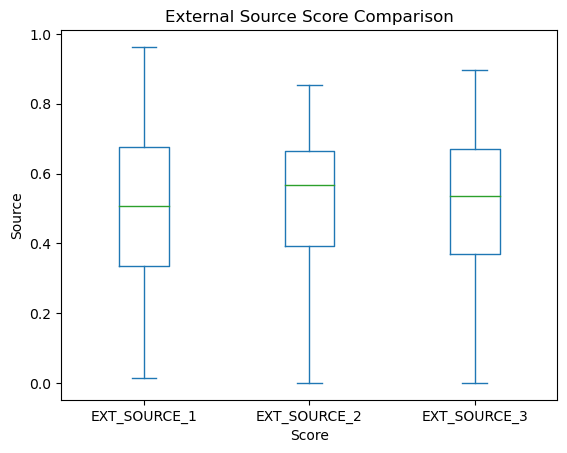

In [14]:
# plotting the box plots for score columns
appd[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].plot.box(title="External Source Score Comparison")
plt.xlabel("Score")
plt.ylabel("Source")
plt.show()

- **Since there are no outliers, we can create a new column with combined mean scores of all 3 columns. We can also remove the 3 columns after creating the new score column**

In [15]:
# creating a new score column with mean of all score columns
appd['score']=appd[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].mean(axis=1)

In [16]:
# checking the new columns added to dataset
appd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,score
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.161787
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.466757
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.642739
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.650442
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.322738


In [17]:
# removing the 3 score columns
appd.drop(appd.loc[:,['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].columns,axis=1, inplace=True)
# verifying that 3 columns have been dropped
appd.shape

(307511, 120)

#### b. Combining the Contact availability flag columns by adding a new contflag column and removing the individual mobile, email and other flag columns.

In [18]:
# Creating a new column contflag which is 1 if all flags regarding Contact availability are 1 else 0
appd['contflag']= appd[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']].all(axis=1).astype(int)
# Checking the new contflag column
appd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,score,contflag
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.161787,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.466757,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.642739,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.650442,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.322738,0


In [19]:
# Dropping the Contact availability columns
appd.drop(appd.loc[:,'FLAG_MOBIL':'FLAG_EMAIL'].columns,axis=1, inplace=True)
# Checking if the columns are dropped
appd.shape

(307511, 115)

#### c. As the Region Rating for the client with city includes the Region Rating for the client, the REGION_RATING_CLIENT can be dropped

In [20]:
# dropping the REGION_RATING_CLIENT column
appd.drop(['REGION_RATING_CLIENT'], axis=1, inplace=True)
# checking the shape to confirm column is dropped
appd.shape

(307511, 114)

#### d. Combining the Address conformance flag columns by adding a new addflag column and removing the individual address confirmation flag columns.

In [21]:
# Creating a new column addflag which is 1 if all flags Address conformance are 1 else 0
appd['addflag']= appd[['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']].all(axis=1).astype(int)
# Checking the new addflag column
appd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,score,contflag,addflag
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.161787,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.466757,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.642739,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.650442,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.322738,0,0


In [22]:
# Dropping the Address conformance columns
appd.drop(appd.loc[:,'REG_REGION_NOT_LIVE_REGION':'LIVE_CITY_NOT_WORK_CITY'].columns,axis=1, inplace=True)
# Checking if the columns are dropped
appd.shape

(307511, 109)

#### e. Combining the observation of client's social circle default by adding a new socdef column and removing the individual  columns.

- **We can use the max of the social circle columns to show the number of people in the social circle of the client who have defaulted**

In [23]:
# add a new column socdef which contains the max of the social circle columns
appd['socdef']= appd[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].max(axis=1)
# Checking the new socdef column
appd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,score,contflag,addflag,socdef
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.161787,0,0,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.466757,0,0,1.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.642739,0,0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,0.650442,0,0,2.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.322738,0,0,0.0


In [24]:
# Dropping the social circle default columns
appd.drop(appd.loc[:,'OBS_30_CNT_SOCIAL_CIRCLE':'DEF_60_CNT_SOCIAL_CIRCLE'].columns,axis=1, inplace=True)
# Checking if the columns are dropped
appd.shape

(307511, 106)

#### f. Combining the document flag columns by adding a new docflag column and removing the individual document flag columns.

In [25]:
# Creating a new column docflag which is 1 if all document flags are 1 else 0
appd['docflag']= appd[['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']].all(axis=1).astype(int)
# Checking the new docflag column
appd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,score,contflag,addflag,socdef,docflag
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,1.0,0.161787,0,0,2.0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.466757,0,0,1.0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.642739,0,0,0.0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,0.650442,0,0,2.0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.322738,0,0,0.0,0


In [26]:
# Dropping the document columns
appd.drop(appd.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].columns,axis=1, inplace=True)
# Checking if the columns are dropped
appd.shape

(307511, 87)

#### f. Combining the Credit Bureau enquiry columns by adding a new credenq column and removing the individual Credit Bureau enquiry columns.

###### We can use the sum of all the columns to show the number of Credit Bureau enquiries of the client for the last year

In [27]:
# add a new column credenq which contains the sum of the Credit Bureau enquiries
appd['credenq']= appd[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].sum(axis=1)
# Checking the new credenq column
appd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,score,contflag,addflag,socdef,docflag,credenq
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,1.0,0.161787,0,0,2.0,0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.466757,0,0,1.0,0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.642739,0,0,0.0,0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,0.650442,0,0,2.0,0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.322738,0,0,0.0,0,0.0


In [28]:
# Dropping the Credit Bureau enquiries columns
appd.drop(appd.loc[:,'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_YEAR'].columns,axis=1, inplace=True)
# Checking if the columns are dropped
appd.shape

(307511, 82)

### 2. Identifying and dropping columns with more than 30% missing data in appd dataset

In [29]:
# Defining function to display all columns with missin values more than y %
def nulvals (x,y):
    colrem=x.isnull().sum()/(x.shape[0])*100
    return colrem[colrem>y]

In [30]:
# Using function to display all columns having more than 30% missing values
nulvals(appd,30)

OWN_CAR_AGE                     65.990810
OCCUPATION_TYPE                 31.345545
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [31]:
# getting number of columns in the null series
nulvals(appd,30).shape

(49,)

###### These columns contain a high number of null value data, and hence we will not be able to use these columns effectively in our analysis. We will be dropping these columns.

In [32]:
# Dropping columns in the null series
appd.drop(appd.loc[:,nulvals(appd,30).keys()].columns,axis=1, inplace=True)

In [33]:
# Checking shape of appd to ensure reduction of 49 columns
appd.shape

(307511, 33)

###### We have verified that 49 columns have been dropped from appd dataset

### 3. Checking missing values in remaining columns in appd and taking corresponding measures to clean data

In [34]:
# Finding the number of columns with missing values more than 0 in appd columns
nulvals(appd,0)

AMT_ANNUITY               0.003902
AMT_GOODS_PRICE           0.090403
NAME_TYPE_SUITE           0.420148
CNT_FAM_MEMBERS           0.000650
DAYS_LAST_PHONE_CHANGE    0.000325
score                     0.055933
socdef                    0.332021
dtype: float64

#### a. Checking the usefullness of who was accompanying the client (NAME_TYPE_SUITE)

In [35]:
# Checking the distribution of accompanying persons overall
appd[appd.TARGET==1].NAME_TYPE_SUITE.value_counts()

NAME_TYPE_SUITE
Unaccompanied      20337
Family              3009
Spouse, partner      895
Children             241
Other_B              174
Other_A               76
Group of people       23
Name: count, dtype: int64

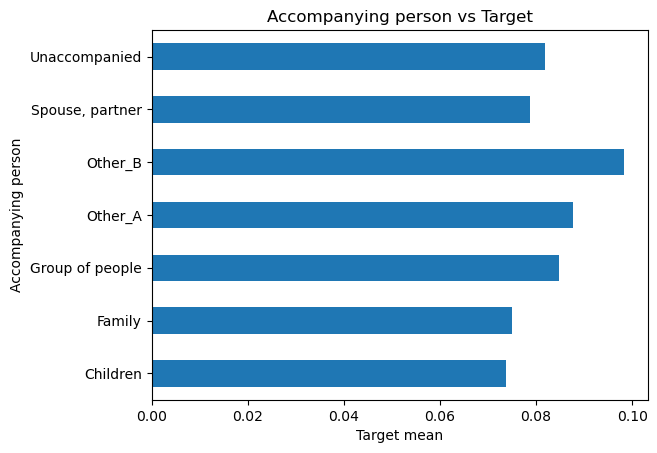

In [36]:
# Plotting the mean Target variable based on this column
appd.groupby("NAME_TYPE_SUITE")['TARGET'].mean().plot.barh(title="Accompanying person vs Target")
plt.xlabel("Target mean")
plt.ylabel("Accompanying person")
plt.show()

###### As the average TARGET variable does not change with who was accompanying the client, and most clients were unaccompanied, we can drop this column as it is not relevant to the study

In [37]:
# dropping the NAME_TYPE_SUITE column
appd.drop(['NAME_TYPE_SUITE'], axis=1, inplace=True)
# checking the shape to confirm column is dropped
appd.shape

(307511, 32)

#### b. Handling the socdef column

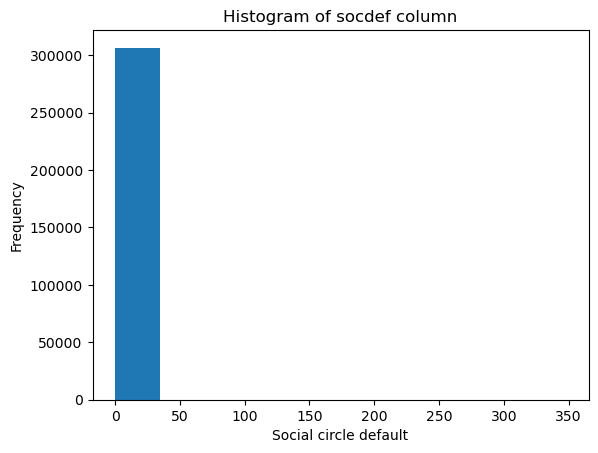

In [38]:
# Checking the distribution of social circle default for defaulting clients
appd.socdef.plot.hist(title="Histogram of socdef column")
plt.xlabel("Social circle default")
plt.show()

In [39]:
appd.socdef.describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: socdef, dtype: float64

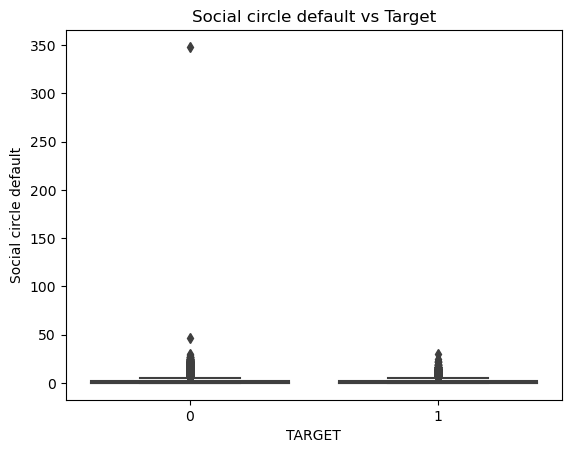

In [40]:
# Plotting the mean Target variable based on socdef column
sns.boxplot(appd, x='TARGET', y='socdef')
plt.ylabel("Social circle default")
plt.title("Social circle default vs Target")
plt.show()

###### As there are a lot of outliers, we can replace the missing values in socdef by the median value

In [41]:
# Replacing the missing values with median value
appd.loc[appd.socdef.isnull(),'socdef']=appd.socdef.median()

In [42]:
# Checking if all missing values are filled in socdef
appd.socdef.isnull().sum()

0

###### c. Handling the missing values in Annuity and Goods values

In [43]:
# Looking at the data set where annuity is null
appd[appd.AMT_ANNUITY.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,score,contflag,addflag,socdef,docflag,credenq
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,WEDNESDAY,13,Business Entity Type 3,-2.0,0.499615,0,0,1.0,0,2.0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,...,MONDAY,20,Business Entity Type 1,-706.0,0.597967,0,0,0.0,0,2.0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,...,WEDNESDAY,15,Self-employed,-199.0,0.692295,0,0,1.0,0,2.0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,...,FRIDAY,13,Government,-2841.0,0.374405,0,0,0.0,0,5.0
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,...,FRIDAY,15,Other,-743.0,0.469667,0,0,0.0,0,7.0
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,...,FRIDAY,15,Business Entity Type 3,-1986.0,0.477615,0,0,0.0,0,11.0
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,...,WEDNESDAY,11,Medicine,-348.0,0.378008,0,0,0.0,0,2.0
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,...,SATURDAY,12,Self-employed,-1331.0,0.497714,0,0,0.0,0,6.0
207186,340147,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,...,WEDNESDAY,13,Security,-295.0,0.548680,0,1,0.0,0,4.0
227939,364022,0,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,...,WEDNESDAY,11,Business Entity Type 3,-1255.0,0.524945,0,0,1.0,0,3.0


In [44]:
# Describing the annuity amount
appd.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

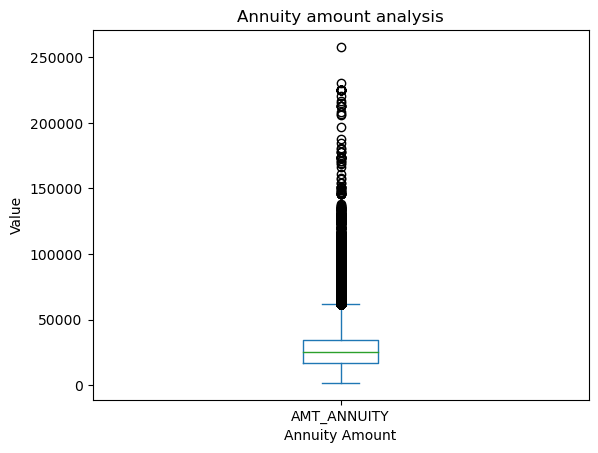

In [45]:
# Plotting the boxplot of the annuity amount
appd.AMT_ANNUITY.plot.box(title="Annuity amount analysis")
plt.xlabel("Annuity Amount")
plt.ylabel("Value")
plt.show()

###### For all rows where annuity amount is null, we see that the Target is 0. Additionally as there is a big difference between the max value and the upper bound of the IQR. So we can proceed with entering the median of the values in the missing values

In [46]:
# Replacing the missing values with median value
appd.loc[appd.AMT_ANNUITY.isnull(),'AMT_ANNUITY']=appd.AMT_ANNUITY.median()

In [47]:
# Checking if all missing values are filled in AMT_ANNUITY
appd.AMT_ANNUITY.isnull().sum()

0

###### For inputing the missing values in goods price column, we can examine the relation iof this column to the credit amount column. Both columns should be similar in their spread, as the customers would be taking a loan to purchase an amount of goods.

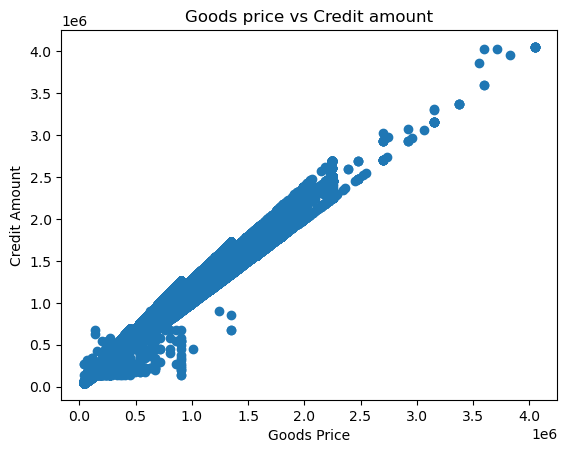

In [48]:
# Plotting the scatter plot between goods price and credit amount column
plt.scatter(x=appd[-appd.AMT_GOODS_PRICE.isnull()].AMT_GOODS_PRICE, y=appd[-appd.AMT_GOODS_PRICE.isnull()].AMT_CREDIT)
plt.title("Goods price vs Credit amount")
plt.xlabel("Goods Price")
plt.ylabel("Credit Amount")
plt.show()

In [49]:
# Finding the Pearson coefficient for these columns
appd[['AMT_GOODS_PRICE','AMT_CREDIT']].corr()

,AMT_GOODS_PRICE,AMT_CREDIT
AMT_GOODS_PRICE,1.000000,0.986968
AMT_CREDIT,0.986968,1.000000


###### As we can see, there is a very high correlation between these columns. We can fill in the missing values of the goods price with the same amount in the credit amount column

In [50]:
# Filling in the missing values in the goods price column with corresponding values in the credit amount column
appd.loc[appd.AMT_GOODS_PRICE.isnull(),'AMT_GOODS_PRICE']=appd.loc[appd.AMT_GOODS_PRICE.isnull(),'AMT_CREDIT']

In [51]:
# Checking if there are any missing values remaining in goods price column
appd.AMT_GOODS_PRICE.isnull().sum()

0

#### d. Handling the missing values in the count of family members, days since last phone change  and credit score columns

In [52]:
# Listing the percentage of missing values in each of these columns
appd[['CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE','score']].isnull().sum()/len(appd.SK_ID_CURR)*100

CNT_FAM_MEMBERS           0.000650
DAYS_LAST_PHONE_CHANGE    0.000325
score                     0.055933
dtype: float64

###### The percentage of rows with missing values in all score column is very small and hence we can drop these rows.

In [53]:
# Dropping the rows with missing columns
appd.dropna(inplace=True)
# Checking for any missing values in appd column
appd.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
ORGANIZATION_TYPE              0
DAYS_LAST_PHONE_CHANGE         0
score                          0
contflag                       0
addflag                        0
socdef                         0
docflag   

###### All missing values have been addressed in the dataset

### 4. Standardizing the values

#### a. The age and days_employed columns

In [54]:
# Adding the age column and filling it with calculated age values
appd['age']=appd.DAYS_BIRTH // 365 * -1
# Checking the dataset for new column
appd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,score,contflag,addflag,socdef,docflag,credenq,age
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,10,Business Entity Type 3,-1134.0,0.161787,0,0,2.0,0,1.0,26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,11,School,-828.0,0.466757,0,0,1.0,0,0.0,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,9,Government,-815.0,0.642739,0,0,0.0,0,0.0,53
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,17,Business Entity Type 3,-617.0,0.650442,0,0,2.0,0,0.0,53
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,11,Religion,-1106.0,0.322738,0,0,0.0,0,0.0,55


In [55]:
# Dropping the DAYS_BIRTH Column
appd.drop(['DAYS_BIRTH'], axis=1, inplace=True)
# Checking the dataset shape for confirmation of dropped column
appd.shape

(307337, 32)

In [56]:
# Checking the age column
appd.age.describe()

count    307337.000000
mean         44.434412
std          11.953617
min          21.000000
25%          35.000000
50%          44.000000
75%          54.000000
max          70.000000
Name: age, dtype: float64

###### Moving to the work duration

In [57]:
# Adding the workduration column and filling it with calculated work duration values
appd['workduration']=appd.DAYS_EMPLOYED // 365 * -1
# Checking the dataset for new column
appd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,score,contflag,addflag,socdef,docflag,credenq,age,workduration
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Business Entity Type 3,-1134.0,0.161787,0,0,2.0,0,1.0,26,2
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,School,-828.0,0.466757,0,0,1.0,0,0.0,46,4
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Government,-815.0,0.642739,0,0,0.0,0,0.0,53,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Business Entity Type 3,-617.0,0.650442,0,0,2.0,0,0.0,53,9
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Religion,-1106.0,0.322738,0,0,0.0,0,0.0,55,9


In [58]:
# Dropping the DAYS_BIRTH Column
appd.drop(['DAYS_EMPLOYED'], axis=1, inplace=True)
# Checking the dataset shape for confirmation of dropped column
appd.shape

(307337, 32)

In [59]:
# Checking the workduration column values
appd.workduration.describe()

count    307337.000000
mean       -174.300689
std         386.992938
min       -1000.000000
25%           1.000000
50%           4.000000
75%           8.000000
max          50.000000
Name: workduration, dtype: float64

###### There are some values which are negative in the workduration column. Checking these values

In [60]:
# Checking the negative workduration values
appd[appd.workduration<0].workduration.describe()

count    55342.0
mean     -1000.0
std          0.0
min      -1000.0
25%      -1000.0
50%      -1000.0
75%      -1000.0
max      -1000.0
Name: workduration, dtype: float64

###### These seem to be all 1 value, which is -1000. If we observe the original dataset, we can see that the DAYS_EMPLOYED column contained a random value of 365243 in case of pensioners or unemployed clients. Lets check this in the current dataset

In [61]:
# Checking if the negative workduration values is for Pensioners and unemployed
appd[appd.workduration<0].NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Pensioner     55320
Unemployed       22
Name: count, dtype: int64

###### We can replace the Pensioner workduration as the maximum value, and unemployed workduration as lowest, which is 0.

In [62]:
# Replacing the Pensioner workduration as maximum value and unemployed workduration as 0
appd.loc[appd.NAME_INCOME_TYPE=='Pensioner','workduration']=appd.workduration.max()
appd.loc[appd.NAME_INCOME_TYPE=='Unemployed','workduration']=0
# Checking if there are any more negative workduration values
appd[appd.workduration<0].NAME_INCOME_TYPE.value_counts()

Series([], Name: count, dtype: int64)

#### b. Correcting the values of the NAME_FAMILY_STATUS column

In [63]:
# Finding the list of unique values in the NAME_FAMILY_STATUS column
appd.NAME_FAMILY_STATUS.value_counts()

NAME_FAMILY_STATUS
Married                 196337
Single / not married     45415
Civil marriage           29746
Separated                19760
Widow                    16079
Name: count, dtype: int64

###### The NAME_FAMILY_STATUS column has the values Married and Civil Marriage, which has the same meaning. We can replace all Civil Marriage values with Married

In [64]:
# Replacing all Civil marriage values with Married in NAME_FAMILY_STATUS column
appd.NAME_FAMILY_STATUS.replace(to_replace='Civil marriage', value='Married', inplace=True)
# Verifying that the values have been replaced
appd.NAME_FAMILY_STATUS.value_counts()

NAME_FAMILY_STATUS
Married                 226083
Single / not married     45415
Separated                19760
Widow                    16079
Name: count, dtype: int64

#### c. Correcting the values of the Gender column

In [65]:
# Checking the distribution of the Gender column
appd.CODE_GENDER.value_counts(normalize=True)

CODE_GENDER
F      0.658248
M      0.341739
XNA    0.000013
Name: proportion, dtype: float64

###### As F is the mode, and there are a small number of XNA values, we can replace XNA by F

In [66]:
# Replacing XNA values in gender column with F
appd.loc[appd.CODE_GENDER=='XNA','CODE_GENDER']='F'
# Checking if XNA is replaced
appd.CODE_GENDER.value_counts(normalize=True)

CODE_GENDER
F    0.658261
M    0.341739
Name: proportion, dtype: float64

#### d. Combining the different categories in Organization type

In [67]:
appd.ORGANIZATION_TYPE.unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [68]:
# Combining similar columns
# Business Entity
appd.loc[appd.ORGANIZATION_TYPE.str.contains('Business Entity'),'ORGANIZATION_TYPE']='Business Entity'
# Transport
appd.loc[appd.ORGANIZATION_TYPE.str.contains('Transport'),'ORGANIZATION_TYPE']='Transport'
# Trade
appd.loc[appd.ORGANIZATION_TYPE.str.contains('Trade'),'ORGANIZATION_TYPE']='Trade'
# Industry
appd.loc[appd.ORGANIZATION_TYPE.str.contains('Industry'),'ORGANIZATION_TYPE']='Industry'
# Checking the unique values
appd.ORGANIZATION_TYPE.unique()

array(['Business Entity', 'School', 'Government', 'Religion', 'Other',
       'XNA', 'Electricity', 'Medicine', 'Self-employed', 'Transport',
       'Construction', 'Housing', 'Kindergarten', 'Trade', 'Industry',
       'Military', 'Services', 'Security Ministries', 'Emergency',
       'Security', 'University', 'Police', 'Postal', 'Agriculture',
       'Restaurant', 'Culture', 'Hotel', 'Bank', 'Insurance', 'Mobile',
       'Legal Services', 'Advertising', 'Cleaning', 'Telecom', 'Realtor'],
      dtype=object)

### 5. Dropping irrelevent columns

#### a. WEEKDAY_APPR_PROCESS_START column

###### Logically, the day of start of application should not affect if there is a default in the loan. We can check and confirm this below.

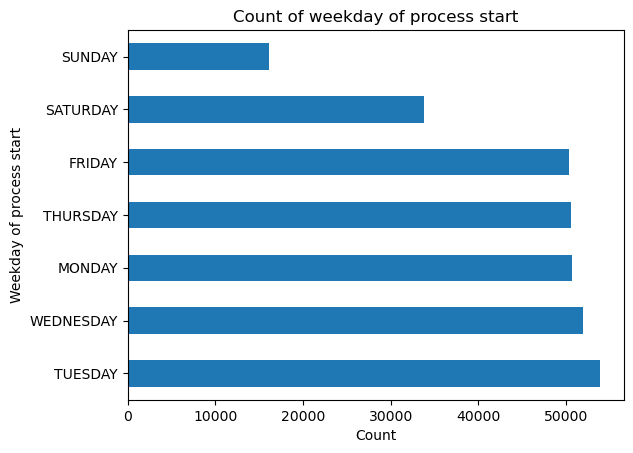

In [69]:
# Checking the spread of the column
appd.WEEKDAY_APPR_PROCESS_START.value_counts().plot.barh()
plt.title("Count of weekday of process start")
plt.xlabel("Count")
plt.ylabel("Weekday of process start")
plt.show()

###### The number of applications started on saturday and sunday are lower being a holiday for most people. Futher, the distribution of the other days is even. We can check the distribution of the Target column over the weekdays to verify if this column is relevant

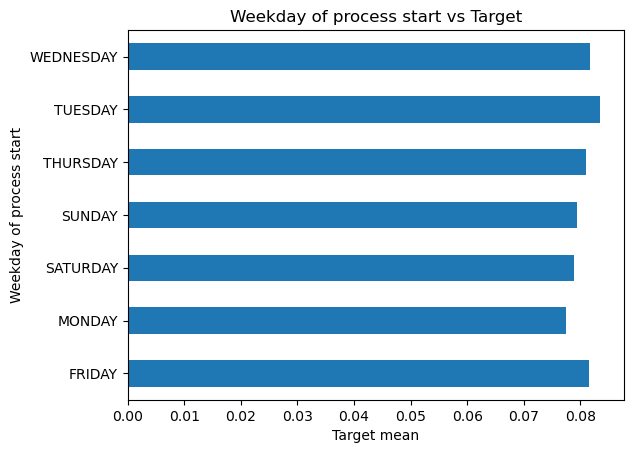

In [70]:
# Plotting the average Target variable across the different weekdays
appd.groupby("WEEKDAY_APPR_PROCESS_START")["TARGET"].mean().plot.barh()
plt.title("Weekday of process start vs Target")
plt.xlabel("Target mean")
plt.ylabel("Weekday of process start")
plt.show()

###### As we see, there is not much difference in the TARGET variable distribution baed on the application start day. We can drop this column as it is irrelevent

In [71]:
# Dropping the WEEKDAY_APPR_PROCESS_START Column
appd.drop(['WEEKDAY_APPR_PROCESS_START'], axis=1, inplace=True)
# Checking the dataset shape for confirmation of dropped column
appd.shape

(307337, 31)

#### b. HOUR_APPR_PROCESS_START Column

###### Similar to the above, this columns should not affect the loan default rate. We can confirm and drop this column as per below:

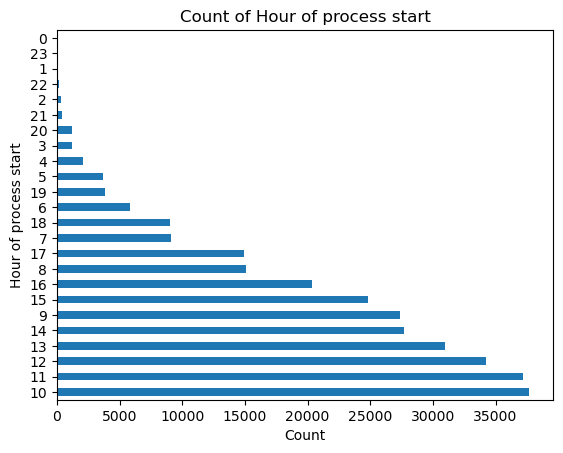

In [72]:
# Checking the spread of the column
appd.HOUR_APPR_PROCESS_START.value_counts().plot.barh()
plt.title("Count of Hour of process start")
plt.xlabel("Count")
plt.ylabel("Hour of process start")
plt.show()

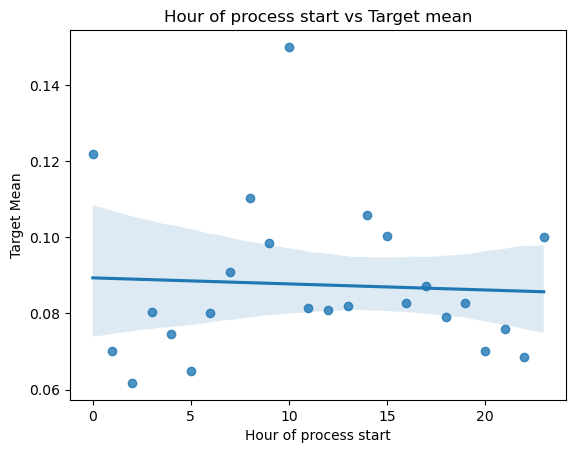

In [73]:
# Plotting the average Target variable across the different hours of day
sns.regplot(x=appd.HOUR_APPR_PROCESS_START.unique(), y=appd.groupby("HOUR_APPR_PROCESS_START")["TARGET"].mean())
plt.title("Hour of process start vs Target mean")
plt.xlabel("Hour of process start")
plt.ylabel("Target Mean")
plt.show()

###### As we can see, there is a very weak correlation between the 2 variables. We can drop this column

In [74]:
# Dropping the WEEKDAY_APPR_PROCESS_START Column
appd.drop(['HOUR_APPR_PROCESS_START'], axis=1, inplace=True)
# Checking the dataset shape for confirmation of dropped column
appd.shape

(307337, 30)

### 6. Handling Outliers

#### a. Plotting all the boxplots for AMT columns

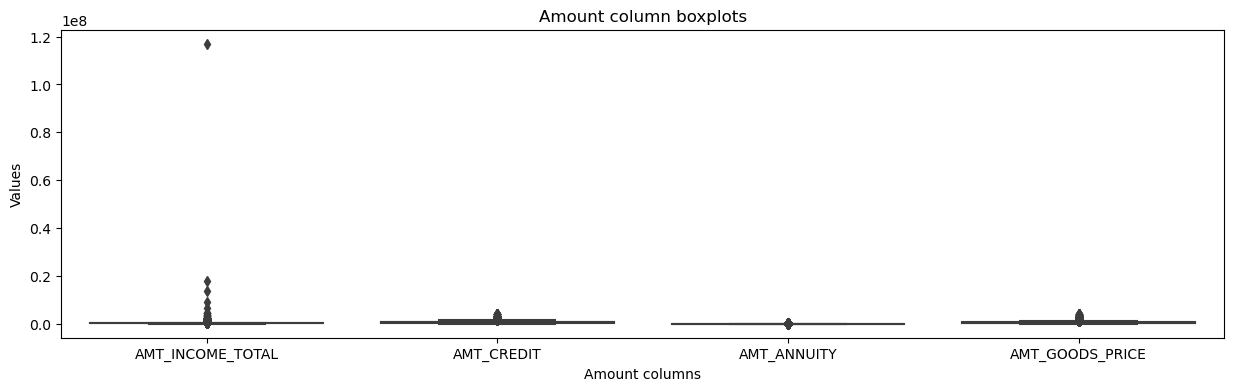

In [75]:
# Plotting boxplots for AMT columns
plt.figure(figsize=[15,4])
sns.boxplot(appd.loc[:,'AMT_INCOME_TOTAL':'AMT_GOODS_PRICE'])
plt.title("Amount column boxplots")
plt.xlabel("Amount columns")
plt.ylabel("Values")
plt.show()

###### The Income column seems to have a lot of outliers. Lets plot the boxplot for this column separately

In [76]:
appd.AMT_INCOME_TOTAL.describe()

count    3.073370e+05
mean     1.688107e+05
std      2.371822e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.480320e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

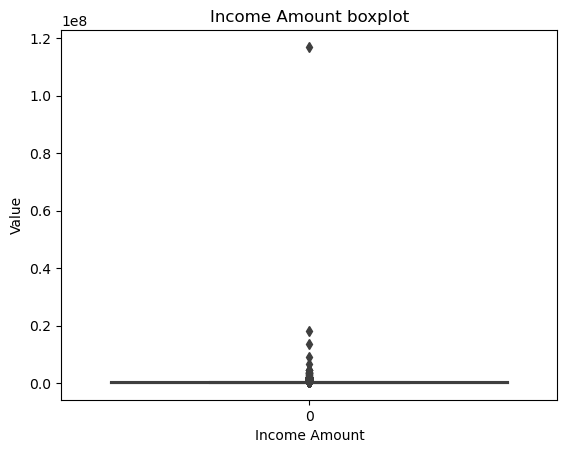

In [77]:
# Plotting boxplot for Income Column
sns.boxplot(appd.AMT_INCOME_TOTAL)
plt.title("Income Amount boxplot")
plt.xlabel("Income Amount")
plt.ylabel("Value")
plt.show()

In [78]:
# Creating a function to find the 99th Percentile
def p99 (x):
    return np.quantile(x, 0.99)

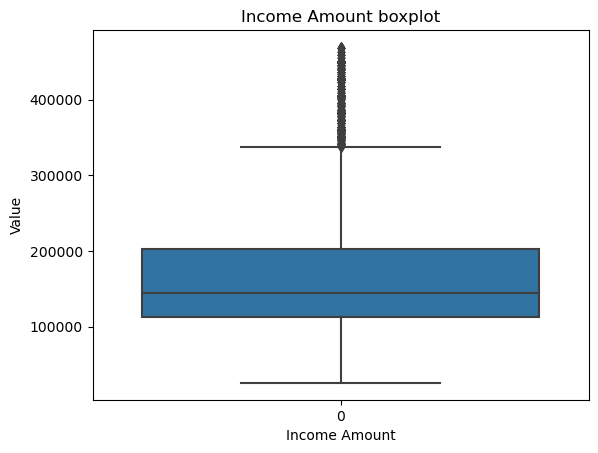

In [79]:
# Plotting boxplot for Income Column up to 99th percentile
sns.boxplot(appd[appd.AMT_INCOME_TOTAL<p99(appd.AMT_INCOME_TOTAL)].AMT_INCOME_TOTAL)
plt.title("Income Amount boxplot")
plt.xlabel("Income Amount")
plt.ylabel("Value")
plt.show()

###### We can limit the income to the 99th percentile

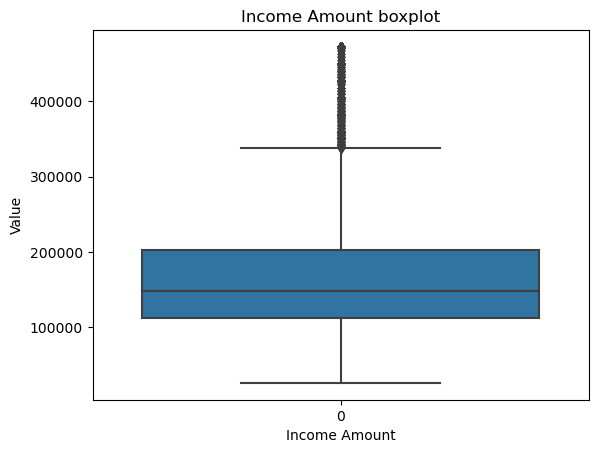

In [80]:
# Capping the income to the 99th percentile
appd.loc[appd.AMT_INCOME_TOTAL>p99(appd.AMT_INCOME_TOTAL),'AMT_INCOME_TOTAL']=p99(appd.AMT_INCOME_TOTAL)
# Checking the boxplot for income again
sns.boxplot(appd.AMT_INCOME_TOTAL)
plt.title("Income Amount boxplot")
plt.xlabel("Income Amount")
plt.ylabel("Value")
plt.show()

#### b. Family columns

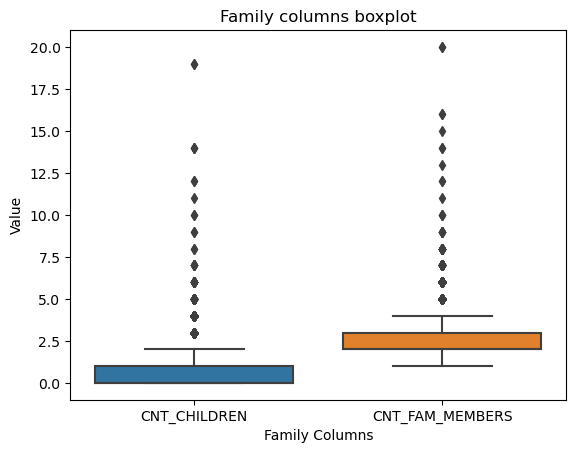

In [81]:
# Plotting the boxplot for all family based columns
sns.boxplot(appd.loc[:,['CNT_CHILDREN','CNT_FAM_MEMBERS']])
plt.title("Family columns boxplot")
plt.xlabel("Family Columns")
plt.ylabel("Value")
plt.show()

###### We see that the outliers for these columns are above approximately 3 children and 5 family members. Again for the family based columns, we don't need to remove outliers as these can be used for correlation.

#### c. Age and Work duration columns

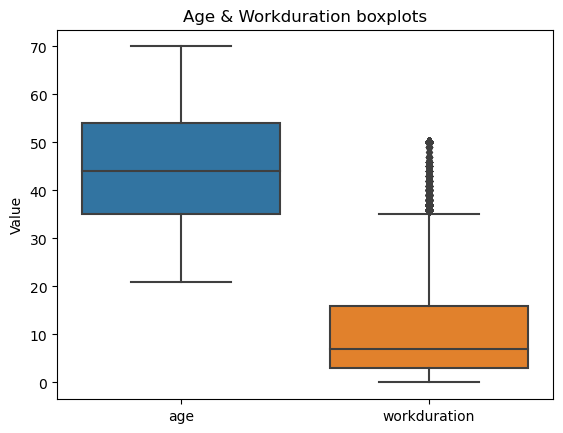

In [82]:
# Plotting the boxplot for all family based columns
sns.boxplot(appd.loc[:,['age','workduration']])
plt.title("Age & Workduration boxplots")
plt.ylabel("Value")
plt.show()

###### There are no outliers in age, and valid outliers for workduation column

#### d. credenq column

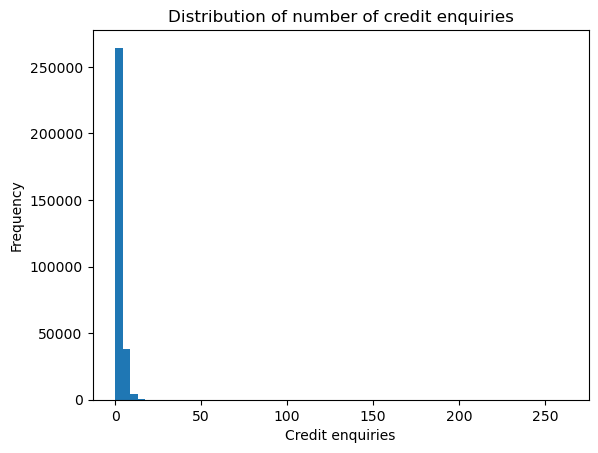

In [83]:
# Checking the distribution of the number of credit enquiries
appd.credenq.plot.hist(bins=60)
plt.title("Distribution of number of credit enquiries")
plt.xlabel("Credit enquiries")
plt.show()

In [84]:
# Describing the credenq variable
appd.credenq.describe()

count    307337.000000
mean          2.146299
std           2.290932
min           0.000000
25%           0.000000
50%           2.000000
75%           3.000000
max         262.000000
Name: credenq, dtype: float64

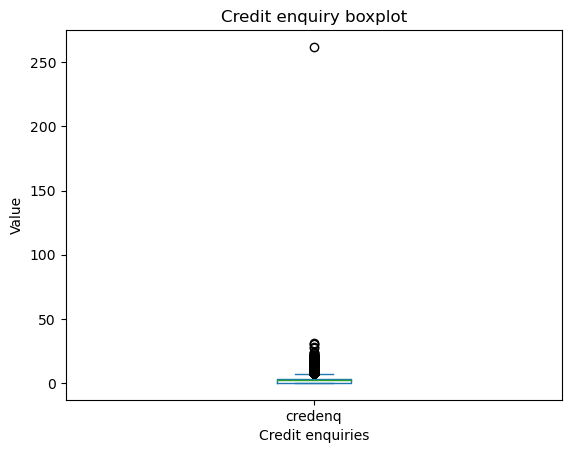

In [85]:
# Plotting the boxplot for this column
appd.credenq.plot.box()
plt.title("Credit enquiry boxplot")
plt.xlabel("Credit enquiries")
plt.ylabel("Value")
plt.show()

In [86]:
# Finding the 99th percentile value of credenq
p99(appd.credenq)

9.0

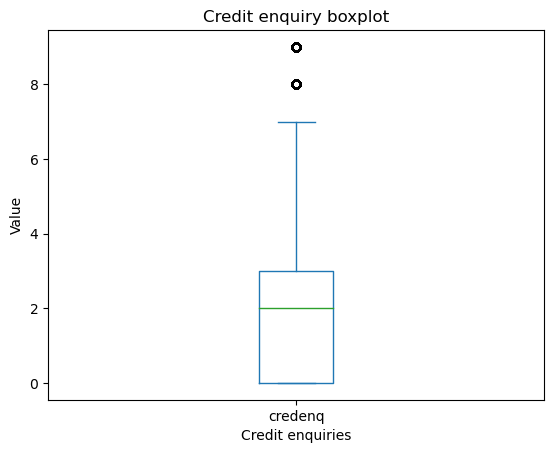

In [87]:
# Capping the values of credenq at 99th percentile
appd.loc[appd.credenq>p99(appd.credenq),'credenq']=p99(appd.credenq)
# plotting the box plot for this column again
appd.credenq.plot.box()
plt.title("Credit enquiry boxplot")
plt.xlabel("Credit enquiries")
plt.ylabel("Value")
plt.show()

### 7. Univariate Analysis

#### a. Categorical unordered univariate analysis

###### Contract Type

In [88]:
# Finding the distribution of Contract Type column
appd.NAME_CONTRACT_TYPE.value_counts(normalize=True)

NAME_CONTRACT_TYPE
Cash loans         0.904805
Revolving loans    0.095195
Name: proportion, dtype: float64

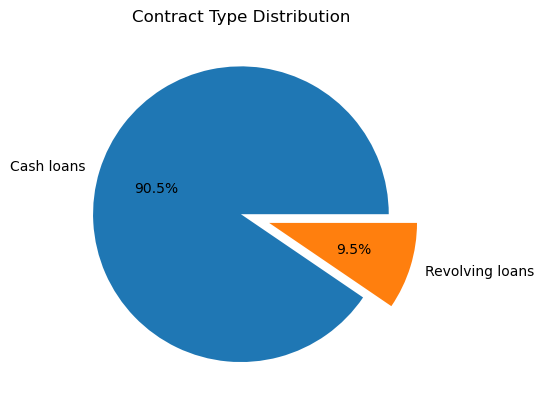

In [89]:
# Plotting a pie chart for contract type
plt.pie(appd.NAME_CONTRACT_TYPE.value_counts(normalize=True), explode=[0,.2], autopct='%.1f%%', labels=appd.NAME_CONTRACT_TYPE.value_counts(normalize=True).index)
plt.title("Contract Type Distribution")
plt.show()

Inferences:
- Most of the loans are a cash type loan
- Only few clients apply for the revolving type loan

###### Gender

In [90]:
# Finding the distribution of gender across clients
appd.CODE_GENDER.value_counts(normalize=True)

CODE_GENDER
F    0.658261
M    0.341739
Name: proportion, dtype: float64

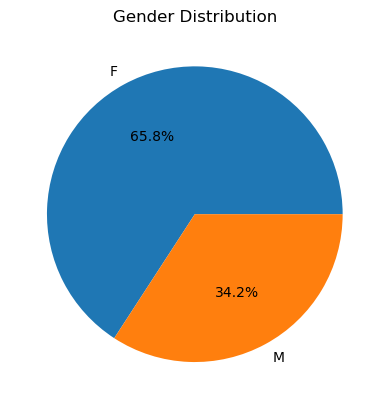

In [91]:
# Plotting a pie chart for gender
plt.pie(appd.CODE_GENDER.value_counts(normalize=True), autopct='%.1f%%', labels=['F','M'])
plt.title("Gender Distribution")
plt.show()

Inferences:
- Most applicants for loan are female

###### Car Owners

In [92]:
# Finding the distribution of Car owners across clients
appd.FLAG_OWN_CAR.value_counts(normalize=True)

FLAG_OWN_CAR
N    0.659842
Y    0.340158
Name: proportion, dtype: float64

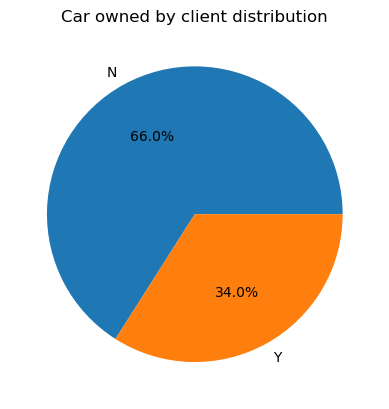

In [93]:
# Plotting a pie chart for car ownership
plt.pie(appd.FLAG_OWN_CAR.value_counts(normalize=True), autopct='%.1f%%', labels=['N','Y'])
plt.title("Car owned by client distribution")
plt.show()

Inferences:
- About a third of clients own a car

###### Realty Ownership

In [94]:
# Finding the distribution of Car owners across clients
appd.FLAG_OWN_REALTY.value_counts(normalize=True)

FLAG_OWN_REALTY
Y    0.693695
N    0.306305
Name: proportion, dtype: float64

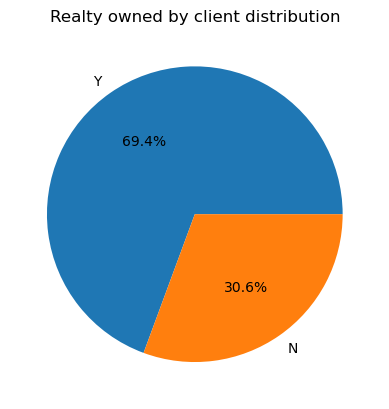

In [95]:
# Plotting a pie chart for realty ownership
plt.pie(appd.FLAG_OWN_REALTY.value_counts(normalize=True), autopct='%.1f%%', labels=['Y','N'])
plt.title("Realty owned by client distribution")
plt.show()

Inferences:
- Close to 70% of clients own Realty
- It seems like most of the loans taken are for buying Realty

###### Income Type

In [96]:
# Finding the distribution of Income type across clients
appd.NAME_INCOME_TYPE.value_counts(normalize=True)

NAME_INCOME_TYPE
Working                 0.516362
Commercial associate    0.232845
Pensioner               0.180030
State servant           0.070584
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: proportion, dtype: float64

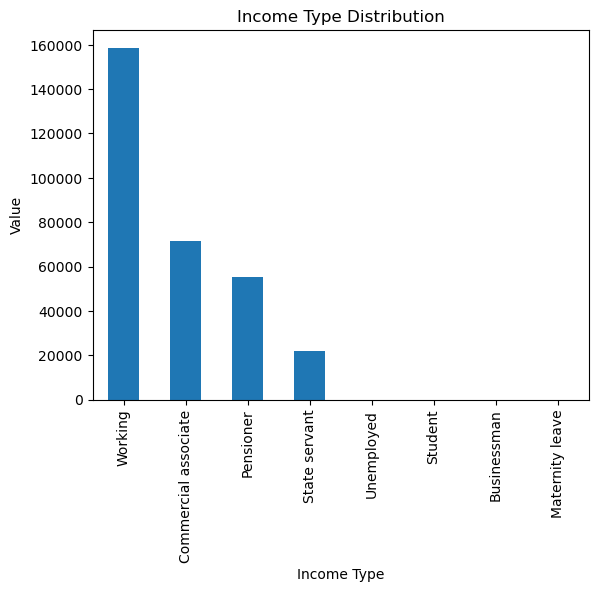

In [97]:
# Plotting the Income type over a bar chart
appd.NAME_INCOME_TYPE.value_counts().plot.bar()
plt.title("Income Type Distribution")
plt.xlabel("Income Type")
plt.ylabel("Value")
plt.show()

Inferences:
- Most of the applicants are working or commercial associates

###### Family Status

In [98]:
# Finding the distribution of Family Status across clients
appd.NAME_FAMILY_STATUS.value_counts(normalize=True)

NAME_FAMILY_STATUS
Married                 0.735619
Single / not married    0.147769
Separated               0.064294
Widow                   0.052317
Name: proportion, dtype: float64

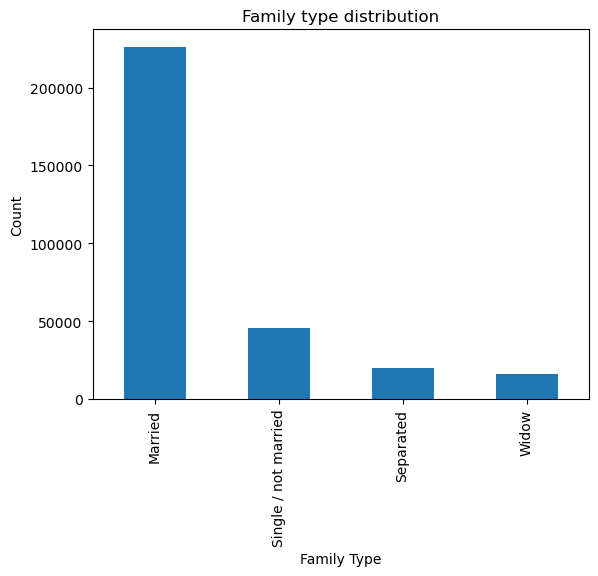

In [99]:
# Plotting the Family status over a bar chart
appd.NAME_FAMILY_STATUS.value_counts().plot.bar()
plt.title("Family type distribution")
plt.xlabel("Family Type")
plt.ylabel("Count")
plt.show()

Inferences:
- Most of the clients are married

###### Organization Type

In [100]:
# Finding the distribution of Organization type across clients
appd.ORGANIZATION_TYPE.value_counts(normalize=True)

ORGANIZATION_TYPE
Business Entity        0.274855
XNA                    0.180069
Self-employed          0.124905
Other                  0.054263
Industry               0.046555
Trade                  0.046525
Medicine               0.036410
Government             0.033823
Transport              0.029248
School                 0.028923
Kindergarten           0.022386
Construction           0.021862
Security               0.010558
Housing                0.009625
Military               0.008567
Bank                   0.008147
Agriculture            0.007981
Police                 0.007611
Postal                 0.007018
Security Ministries    0.006420
Restaurant             0.005893
Services               0.005118
University             0.004318
Hotel                  0.003140
Electricity            0.003088
Insurance              0.001936
Telecom                0.001874
Emergency              0.001822
Advertising            0.001396
Realtor                0.001288
Culture               

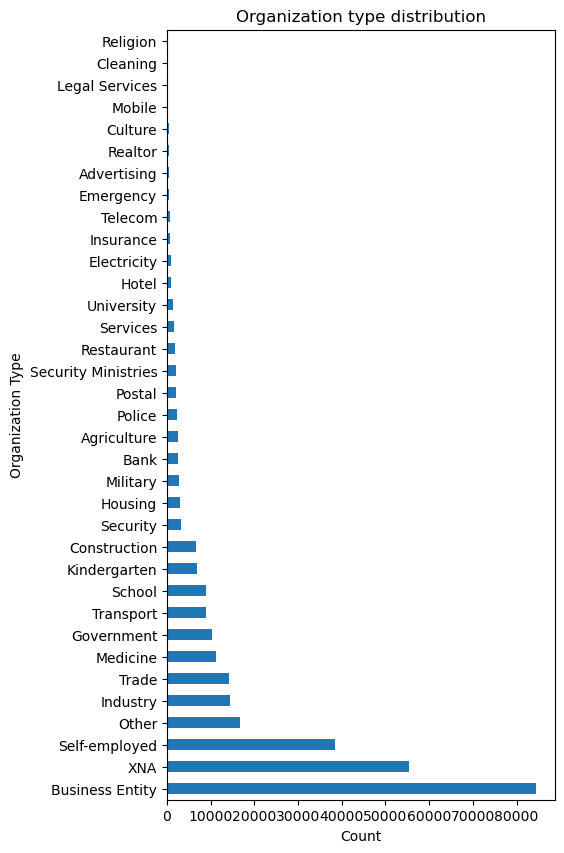

In [101]:
# Plotting the distribution of Organization Type as a horizontal bar chart
plt.figure(figsize=[5,10])
appd.ORGANIZATION_TYPE.value_counts().plot.barh()
plt.title("Organization type distribution")
plt.xlabel("Count")
plt.ylabel("Organization Type")
plt.show()

Inferences:
- Most clients work at Business Entity
- Approximately 18% of clients have not disclosed their Organization Type

#### b. Categorical ordered univariate analysis

###### Education

In [102]:
# Finding the distribution of Education level across clients
appd.NAME_EDUCATION_TYPE.value_counts(normalize=True)

NAME_EDUCATION_TYPE
Secondary / secondary special    0.710194
Higher education                 0.243469
Incomplete higher                0.033400
Lower secondary                  0.012403
Academic degree                  0.000534
Name: proportion, dtype: float64

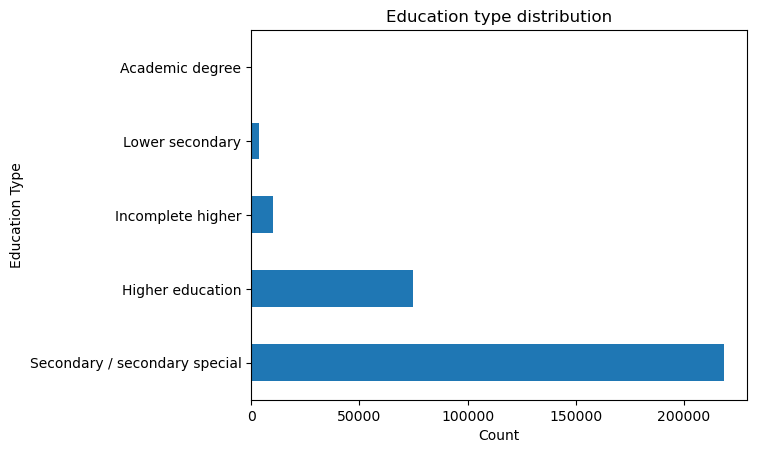

In [103]:
# Plotting a horizontal bar chart for education level
appd.NAME_EDUCATION_TYPE.value_counts().plot.barh()
plt.title("Education type distribution")
plt.xlabel("Count")
plt.ylabel("Education Type")
plt.show()

Inferences:
- Most of the clients are from the Secondary education level
- The next biggest level of education is Higher Education
- Lowest number of clients have an academic degree

Target Variable

In [104]:
# Finding the distribution of Target variable
appd.TARGET.value_counts(normalize=True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

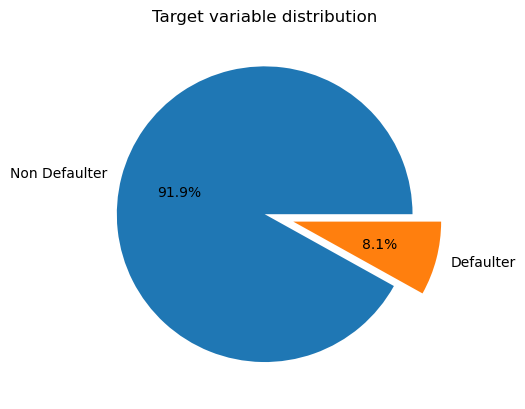

In [105]:
# Plotting a pie chart for the Target variable
plt.pie(appd.TARGET.value_counts(normalize=True), explode=[0,.2], autopct='%.1f%%', labels=['Non Defaulter','Defaulter'])
plt.title("Target variable distribution")
plt.show()

In [106]:
# Finding the ratio of imbalance
appd[appd.TARGET==0].TARGET.shape[0]/appd[appd.TARGET==1].TARGET.shape[0]

11.387126677683286

Inferences
- This is a highly unbalanced dataset with a ratio of over 11
- There are approximately 8% defaulters, which makes sense as the Bank would ensure that loans are provided only to dependable clients

#### c. Numerical variable univariate analysis

###### Age

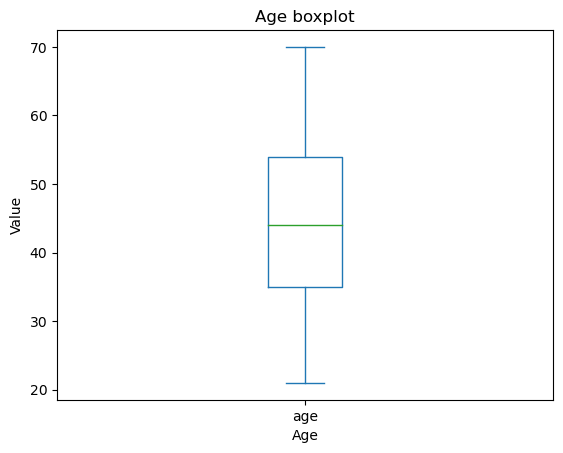

In [107]:
# Plotting the box plot of age
appd.age.plot.box()
plt.title("Age boxplot")
plt.xlabel("Age")
plt.ylabel("Value")
plt.show()

Inferences
- Clients are between approximately 21 and 70 years of age

###### Credit Amount

In [108]:
# Describing the credit amount column
appd.AMT_CREDIT.describe()

count    3.073370e+05
mean     5.990951e+05
std      4.025195e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

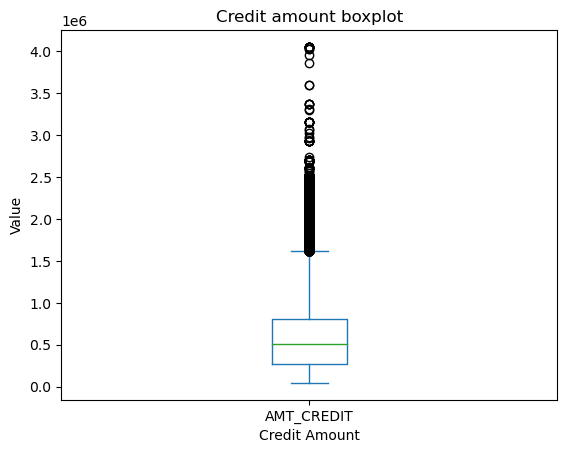

In [109]:
# Plotting box plot for Credit amount column
appd.AMT_CREDIT.plot.box()
plt.title("Credit amount boxplot")
plt.xlabel("Credit Amount")
plt.ylabel("Value")
plt.show()

Inferences:
- Clients have taken loans for amounts up to approximately 4,000,000

### 8. Bivariate Analysis

#### a. Numeric Numeric Variable

###### Income vs Credit

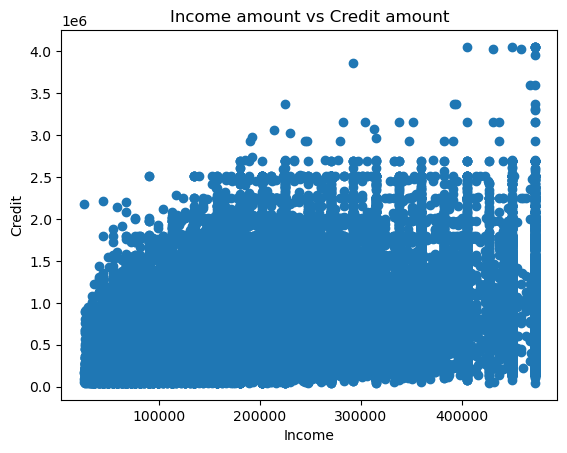

In [110]:
# Plotting the scatter graph between Income & Credit amounts
plt.scatter(appd.AMT_INCOME_TOTAL, appd.AMT_CREDIT)
plt.title("Income amount vs Credit amount")
plt.xlabel("Income")
plt.ylabel("Credit")
plt.show()

Inferences:
- There is a weak positive correlation between Credit and Income

###### Credit vs Annuity

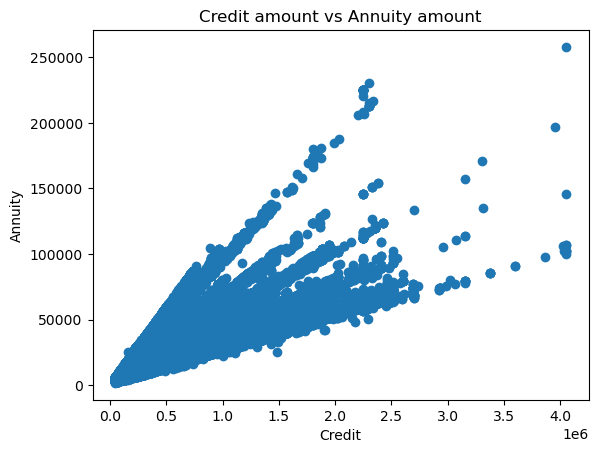

In [111]:
# Plotting the scatter graph between Credit & Annuity amounts
plt.scatter(appd.AMT_CREDIT, appd.AMT_ANNUITY)
plt.xlabel("Credit")
plt.ylabel("Annuity")
plt.title("Credit amount vs Annuity amount")
plt.show()

Inferences:
- There is a strong correlation between Credit amount and Annuity which is expected as Annuity is a function of Credit & Term
- The different straight lines seem to be forming around the most populer loan terms

Income vs Credit vs Region Population

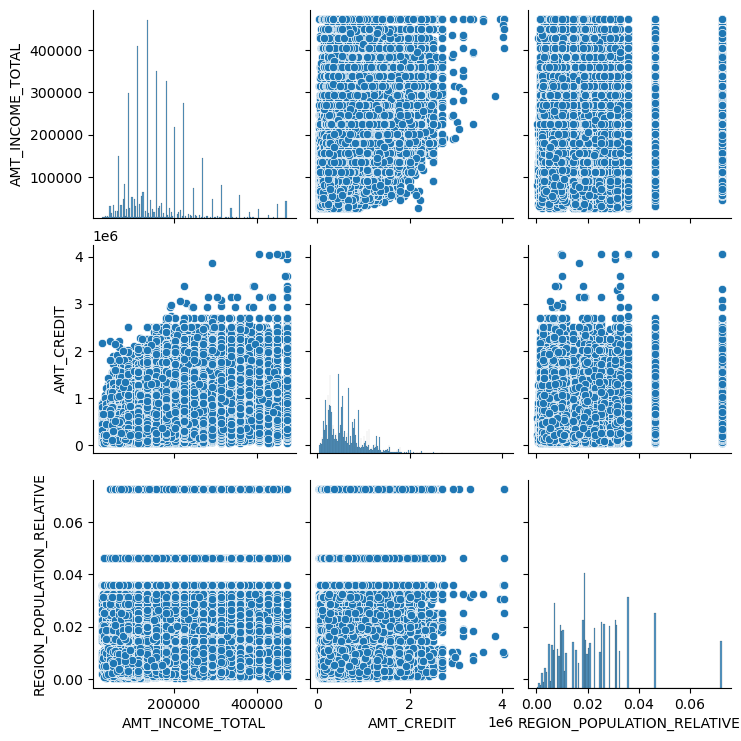

In [112]:
# Plotting a pairplot between the variables
sns.pairplot(data=appd, vars=['AMT_INCOME_TOTAL','AMT_CREDIT','REGION_POPULATION_RELATIVE'])
plt.show()

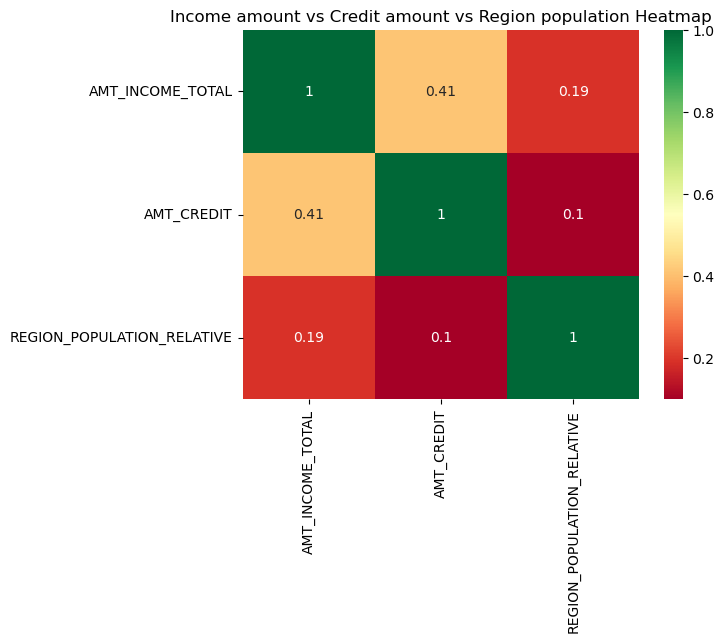

In [113]:
# Plotting a correlation heatmap between these variables
sns.heatmap(appd[['AMT_INCOME_TOTAL','AMT_CREDIT','REGION_POPULATION_RELATIVE']].corr(), annot=True, cmap="RdYlGn")
plt.title("Income amount vs Credit amount vs Region population Heatmap")
plt.show()

Inferences:
- There is weak correlation between these variables

###### No of children vs No of Family Members

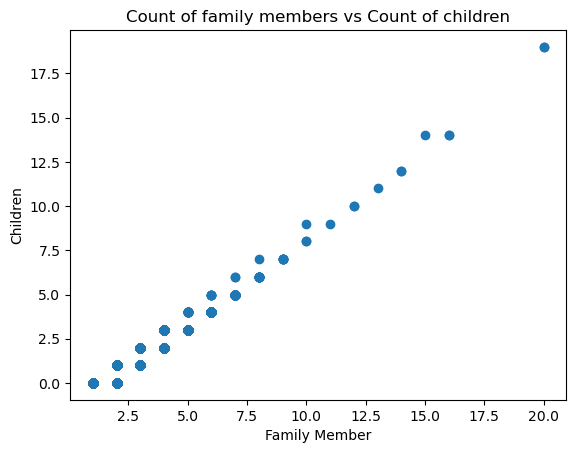

In [114]:
# Plotting a pairplot between the variables
plt.scatter(x=appd.CNT_FAM_MEMBERS,y=appd.CNT_CHILDREN)
plt.xlabel("Family Member")
plt.ylabel("Children")
plt.title("Count of family members vs Count of children")
plt.show()

Inferences:
- The variables number of children and Family are closely related, which is expected as children are included in count of family members

###### Age vs Income vs Credit

<function matplotlib.pyplot.show(close=None, block=None)>

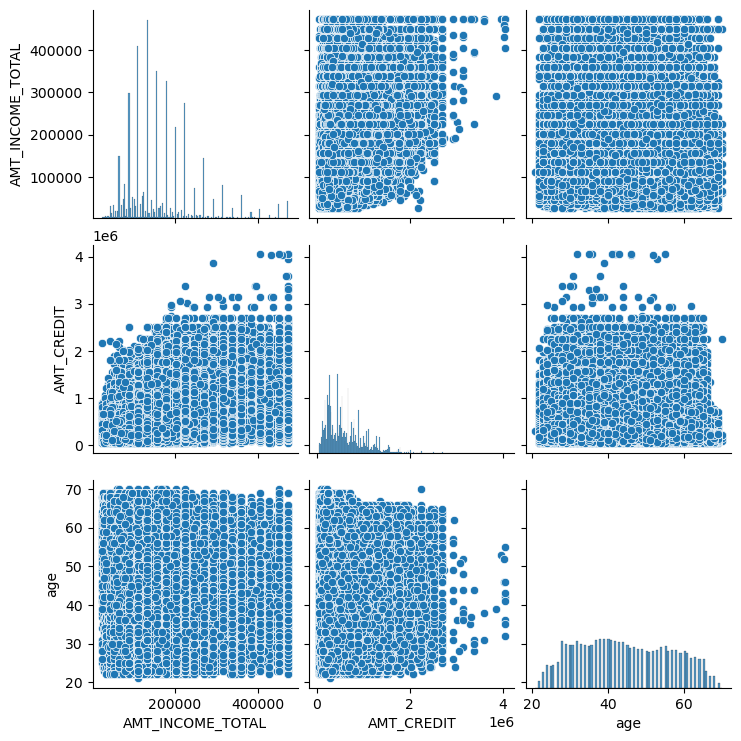

In [115]:
# Plotting a pairplot between the variables
sns.pairplot(data=appd, vars=['AMT_INCOME_TOTAL','AMT_CREDIT','age'])
plt.show

Inferences:
- The income and credit are quite evenly spread across different ages.
- People in the middle range of age seem to be the only ones applying for high loan amounts

#### b. Numerical Categorical Variable

###### Income vs Target

In [116]:
# Finding the mean and median income for the Target variable
appd.groupby('TARGET')['AMT_INCOME_TOTAL'].mean()


TARGET
0    166609.936230
1    159519.773064
Name: AMT_INCOME_TOTAL, dtype: float64

In [117]:
appd.groupby('TARGET')['AMT_INCOME_TOTAL'].median()

TARGET
0    148500.0
1    135000.0
Name: AMT_INCOME_TOTAL, dtype: float64

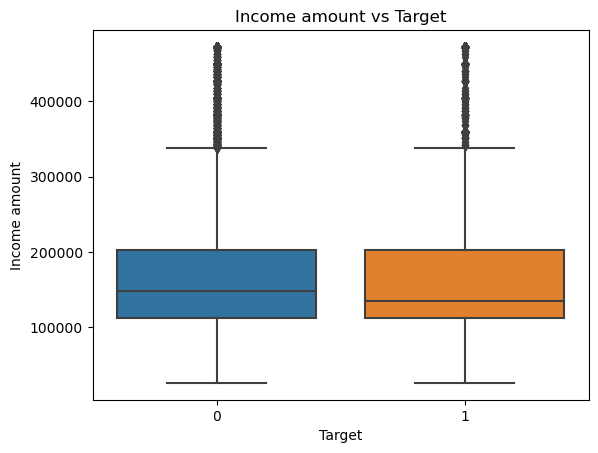

In [118]:
# Plotting the box plot for Income and Target variables
sns.boxplot(appd, x='TARGET', y='AMT_INCOME_TOTAL')
plt.title("Income amount vs Target")
plt.xlabel("Target")
plt.ylabel("Income amount")
plt.show()

Inferences:
- Clients default on their loans across income ranges
- Target variable does not seem to be dependent on income

###### Credit Amount vs Target

In [119]:
# Finding the mean and median credit for the Target variable
appd.groupby('TARGET')['AMT_CREDIT'].mean()

TARGET
0    602717.348996
1    557848.163496
Name: AMT_CREDIT, dtype: float64

In [120]:
appd.groupby('TARGET')['AMT_CREDIT'].median()

TARGET
0    517788.0
1    497520.0
Name: AMT_CREDIT, dtype: float64

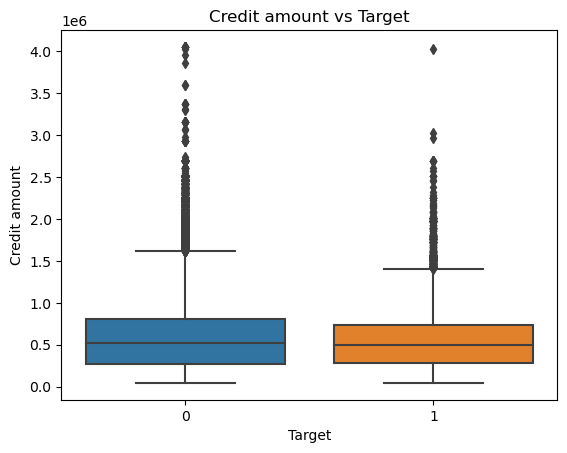

In [121]:
# Plotting the box plot for Credit amount and Target variables
sns.boxplot(appd, x='TARGET', y='AMT_CREDIT')
plt.title("Credit amount vs Target")
plt.xlabel("Target")
plt.ylabel("Credit amount")
plt.show()

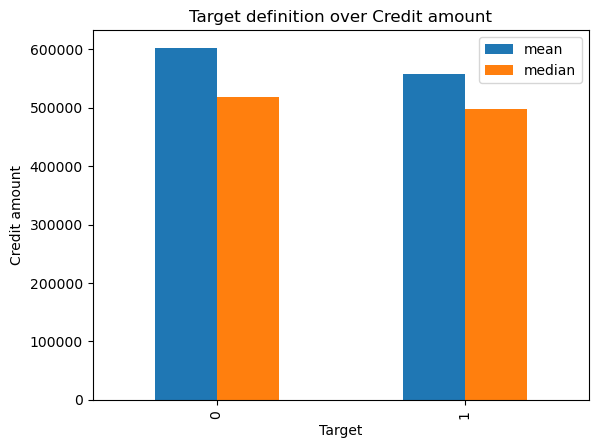

In [122]:
appd.groupby('TARGET')['AMT_CREDIT'].aggregate(['mean', 'median']).plot.bar()
plt.title("Target definition over Credit amount")
plt.xlabel("Target")
plt.ylabel("Credit amount")
plt.show()

Inferences:
- There are not a lot of outliers in the Credit data
- Loan default does not seem to be affected by Credit amount

###### Region Population vs Target

In [123]:
# Finding the mean and median income for the Target variable
appd.groupby('TARGET')['REGION_POPULATION_RELATIVE'].mean()

TARGET
0    0.021021
1    0.019128
Name: REGION_POPULATION_RELATIVE, dtype: float64

In [124]:
appd.groupby('TARGET')['REGION_POPULATION_RELATIVE'].mean()

TARGET
0    0.021021
1    0.019128
Name: REGION_POPULATION_RELATIVE, dtype: float64

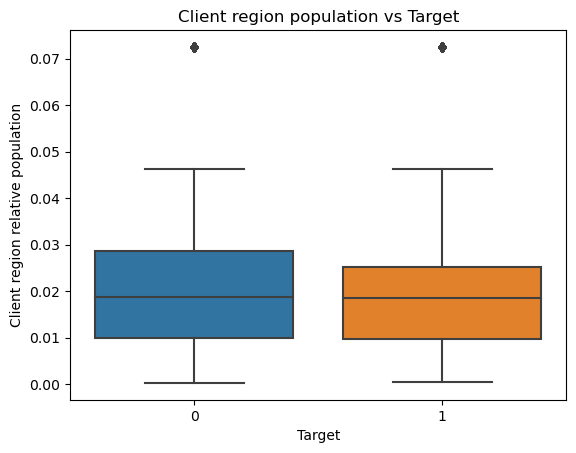

In [125]:
# Plotting the box plot for Region population and Target variables
sns.boxplot(appd, x='TARGET', y='REGION_POPULATION_RELATIVE')
plt.title("Client region population vs Target")
plt.xlabel("Target")
plt.ylabel("Client region relative population")
plt.show()

Inferences:
- There are not a lot of outliers in the Region population data
- Loan default does not seem to be affected by Region population

###### Work duration vs Target

In [126]:
# Finding the mean and median work duration for the Target variable
appd.groupby('TARGET')['workduration'].mean()

TARGET
0    15.116322
1    10.823989
Name: workduration, dtype: float64

In [127]:
appd.groupby('TARGET')['workduration'].median()

TARGET
0    7.0
1    4.0
Name: workduration, dtype: float64

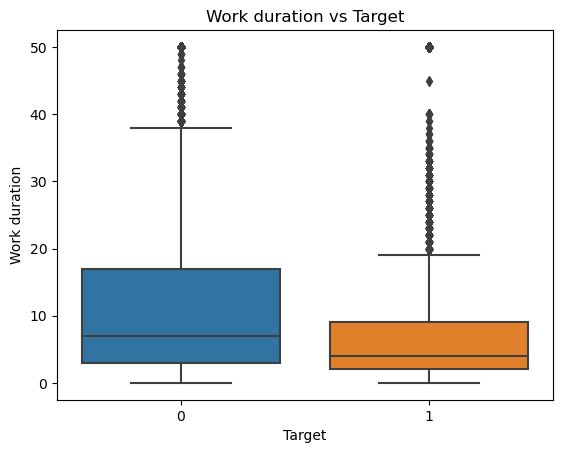

In [128]:
# Plotting the box plot for Work duration and Target variables
sns.boxplot(appd, x='TARGET', y='workduration')
plt.title("Work duration vs Target")
plt.xlabel("Target")
plt.ylabel("Work duration")
plt.show()

Inferences:
- Loan default seems to be more prevalent in people with less than approximately 20 years of work experience

###### Credit score vs Target

In [129]:
# Finding the mean and median credit score for the Target variable
appd.groupby('TARGET')['score'].mean()

TARGET
0    0.519108
1    0.397003
Name: score, dtype: float64

In [130]:
appd.groupby('TARGET')['score'].median()

TARGET
0    0.533790
1    0.399057
Name: score, dtype: float64

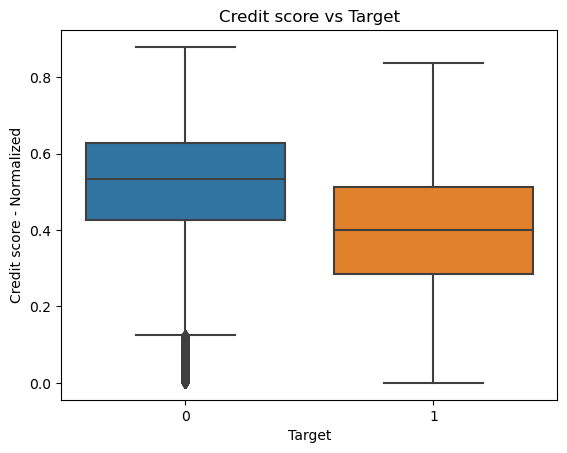

In [131]:
# Plotting the box plot for credit score and Target variables
sns.boxplot(appd, x='TARGET', y='score')
plt.title("Credit score vs Target")
plt.xlabel("Target")
plt.ylabel("Credit score - Normalized")
plt.show()

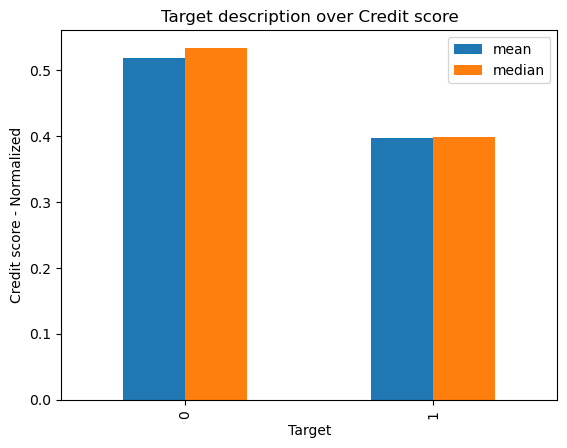

In [132]:
# Plotting a bar graph between the target variable and mean/median scores
appd.groupby('TARGET')['score'].aggregate(['mean', 'median']).plot.bar()
plt.title("Target description over Credit score")
plt.xlabel("Target")
plt.ylabel("Credit score - Normalized")
plt.show()

Inferences:
- Loan default seems to be more prevalent in people with a generally lower score

#### c. Categorical - Categorical variable

###### Income type vs Target

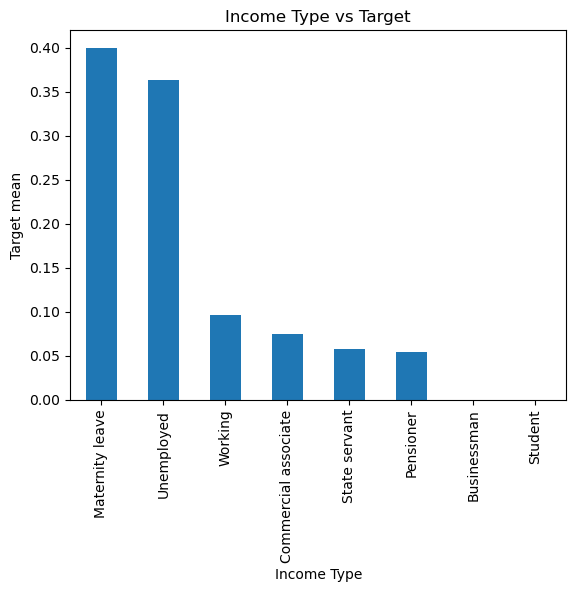

In [225]:
# Plotting a bar graph between Income type and Target
appd.groupby('NAME_INCOME_TYPE')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title("Income Type vs Target")
plt.ylabel("Target mean")
plt.xlabel("Income Type")
plt.show()

Inferences:
- Clients who are on maternity leave at time of application or unemployed have a higher occurence on defaulting on their loan
- Students and businessmen have the lowest occurence of loan default

###### Education vs Target

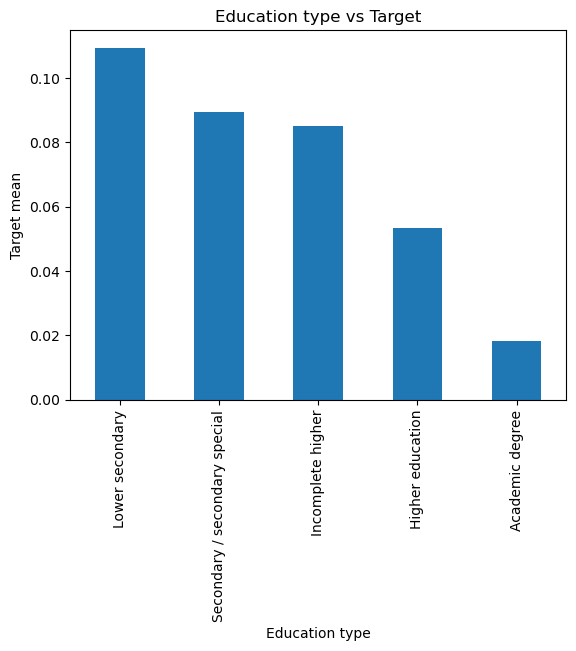

In [226]:
# Plotting a bar graph between Education type and Target
appd.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title("Education type vs Target")
plt.ylabel("Target mean")
plt.xlabel("Education type")
plt.show()

Inferences:
- Clients who have an education of lesser than higher education have higher frequency of default
- Clients with an academic degree have the lowest occurence of loan default

###### Gender vs Target

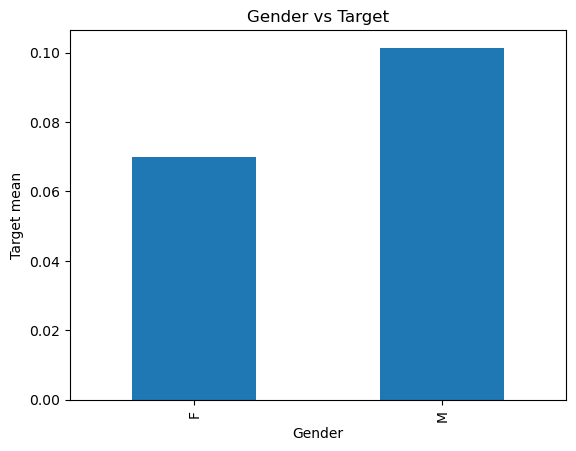

In [135]:
# Plotting a bar graph between Gender and Target
appd.groupby('CODE_GENDER')['TARGET'].mean().plot.bar()
plt.title("Gender vs Target")
plt.xlabel("Gender")
plt.ylabel("Target mean")
plt.show()

Inferences:
- Male clients have a slightly higher occurence of default

###### Family Status vs Target

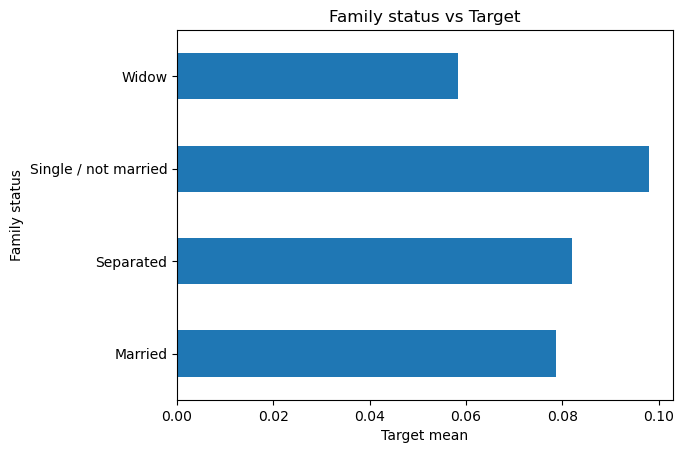

In [136]:
# Plotting a bar graph between Family status and Target
appd.groupby('NAME_FAMILY_STATUS')['TARGET'].mean().plot.barh()
plt.title("Family status vs Target")
plt.xlabel("Target mean")
plt.ylabel("Family status")
plt.show()

Inferences:
- Clients who are single have a slightly higher occurence on defaulting on their loan
- Widows have the lowest occurence of loan default

###### Age vs Target

In [137]:
# Creating the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column in a new agegrp column
appd["agegrp"]=pd.cut(appd.age,[0, 30, 40, 50, 60, 9999], labels= ["<30","30-40","40-50","50-60", "60+"])
appd.agegrp.value_counts(normalize= True)

agegrp
30-40    0.267657
40-50    0.248948
50-60    0.221356
<30      0.146344
60+      0.115694
Name: proportion, dtype: float64

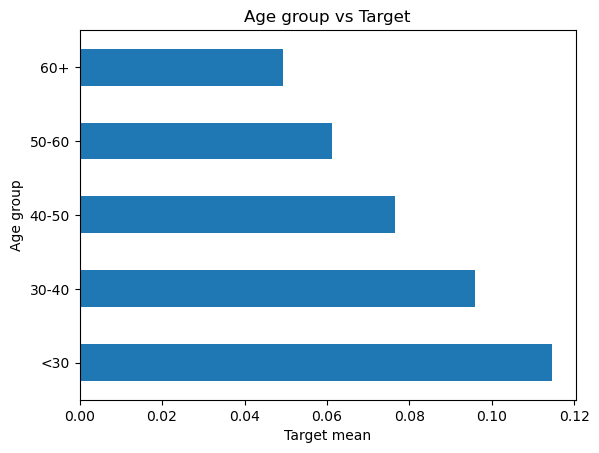

In [138]:
# Plotting bar graph between age group and target
appd.groupby('agegrp')['TARGET'].mean().plot.barh()
plt.title("Age group vs Target")
plt.xlabel("Target mean")
plt.ylabel("Age group")
plt.show()

Inferences:
- Younger Clients have a higher occurence of defaulting on their loan
- Loan default occurence reduces with age

###### Organization Type vs Target

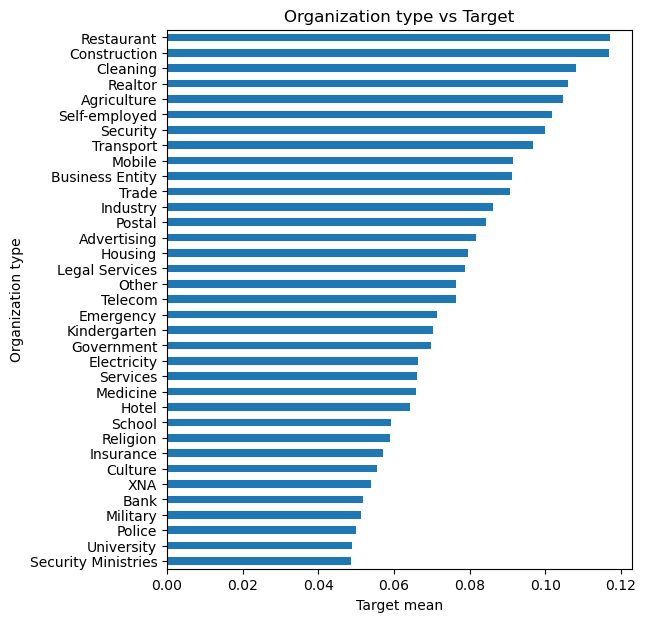

In [228]:
# Plotting a bar graph between Organization type and Target
plt.figure(figsize=[6,7])
appd.groupby('ORGANIZATION_TYPE')['TARGET'].mean().sort_values().plot.barh()
plt.title("Organization type vs Target")
plt.xlabel("Target mean")
plt.ylabel("Organization type")
plt.show()

Inferences:
- Riskier business industries like restaurants, construction and others have the highest Occurrence of defaults
- Government and stable industries like Banks have the lowest Occurrence of defaults

###### Housing type vs Target

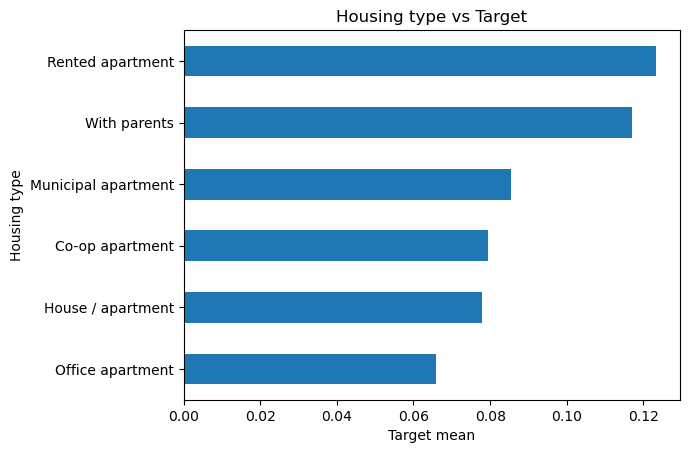

In [140]:
# Plotting a bar graph between Housing type and Target
appd.groupby('NAME_HOUSING_TYPE')['TARGET'].mean().sort_values().plot.barh()
plt.title("Housing type vs Target")
plt.xlabel("Target mean")
plt.ylabel("Housing type")
plt.show()

Inferences:
- Clients staying in rented apartments and with parents have the highest occurrences of default
- Clients staying at office apartments have the lowest occurrence of loan default

###### Income vs Target

In [141]:
# Creating buckets in the income variable to convert it to a categorical variable
appd['incmgrp']=pd.cut(appd.AMT_INCOME_TOTAL,[0, 100000, 200000, 300000,400000, 9999999999999], labels= ["<100k","100k-200k","200k-300k","300k-400k", "400k+"])
# verifying the created buckets
appd.incmgrp.value_counts()

incmgrp
100k-200k    155813
200k-300k     65149
<100k         63645
300k-400k     14671
400k+          8059
Name: count, dtype: int64

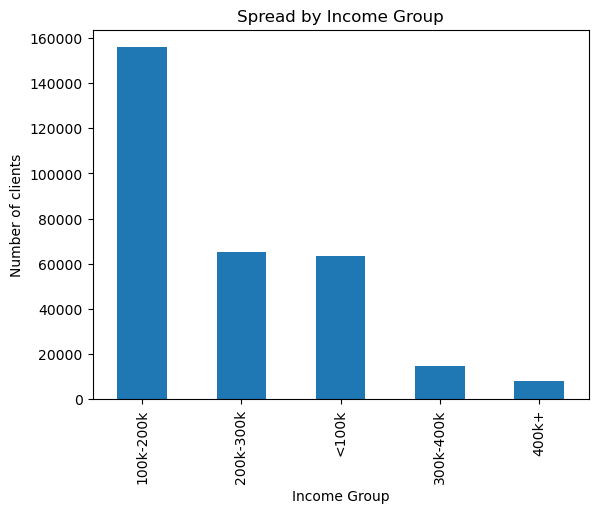

In [142]:
# Inspecting the spread of the created income group
appd.incmgrp.value_counts().plot.bar(title="Spread by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Number of clients")
plt.show()

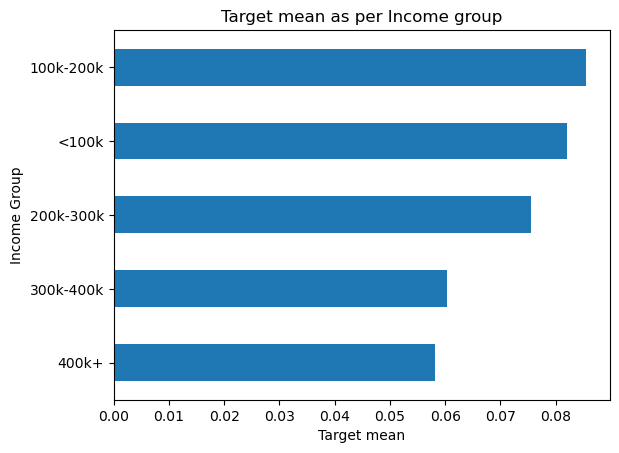

In [143]:
# Plotting a bar graph between Income group and Target
appd.groupby('incmgrp')['TARGET'].mean().sort_values().plot.barh(title="Target mean as per Income group")
plt.xlabel("Target mean")
plt.ylabel("Income Group")
plt.show()

Inferences:
- Lower income groups have a higher chance of defaulting on loans
- Clients from the higher income group have a lower occurrence of loan default

###### Count of family members vs Target

In [144]:
# Listing all values of family count
appd.CNT_FAM_MEMBERS.value_counts()

CNT_FAM_MEMBERS
2.0     158272
1.0      67808
3.0      52565
4.0      24689
5.0       3474
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64

In [145]:
# Creating buckets for number of family members
appd['famcount']=pd.cut(appd.CNT_FAM_MEMBERS,[ 0,1, 2, 3,4, 9999], labels= ["1","2","3","4", "5+"])
# verifying the created buckets
appd.famcount.value_counts()

famcount
2     158272
1      67808
3      52565
4      24689
5+      4003
Name: count, dtype: int64

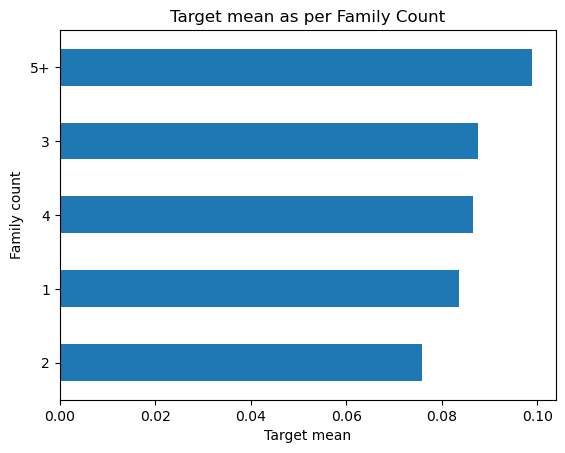

In [146]:
# Plotting a bar graph between Family count and Target
appd.groupby('famcount')['TARGET'].mean().sort_values().plot.barh(title="Target mean as per Family Count")
plt.xlabel("Target mean")
plt.ylabel("Family count")
plt.show()

Inferences
- Default occurrence is lower for lower number of family members

###### Count of children vs Target

In [147]:
# Listing all values of children count
appd.CNT_CHILDREN.value_counts()

CNT_CHILDREN
0     215252
1      61078
2      26739
3       3713
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64

In [148]:
# Creating buckets for number of children
appd['chldcount']=pd.cut(appd.CNT_CHILDREN,[ -1,0,1, 2,3, 9999], labels= ["0","1","2",'3',"4+"])
# verifying the created buckets
appd.chldcount.value_counts()

chldcount
0     215252
1      61078
2      26739
3       3713
4+       555
Name: count, dtype: int64

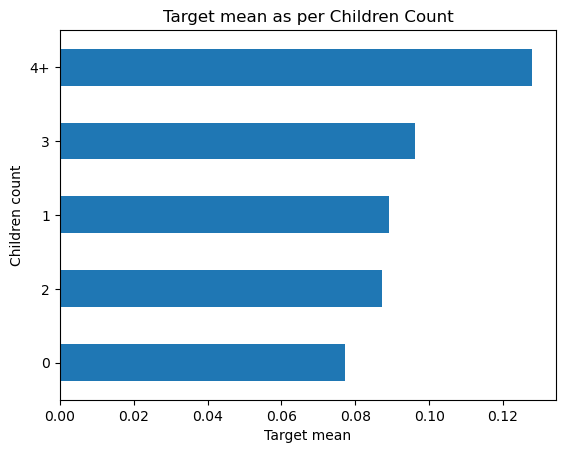

In [149]:
# Plotting a bar graph between Children count and Target
appd.groupby('chldcount')['TARGET'].mean().sort_values().plot.barh(title="Target mean as per Children Count")
plt.xlabel("Target mean")
plt.ylabel("Children count")
plt.show()

Inferences
- The occurrence of default in case of clients with 0 to 3 children is almost similar, with clients having no children having the lowest rate of default
- Clients with 4 or more children have a much higher rate of default

### 9. Multivariate Analysis

###### Gender vs Family Status vs Target

In [150]:
# Creating pivot table between 3 variables
pvt1=pd.pivot_table(appd,index="CODE_GENDER", columns='NAME_FAMILY_STATUS', values='TARGET')
pvt1

NAME_FAMILY_STATUS,Married,Separated,Single / not married,Widow
CODE_GENDER,,,,
F,0.070342,0.067633,0.077658,0.054545
M,0.093206,0.133442,0.132669,0.121246


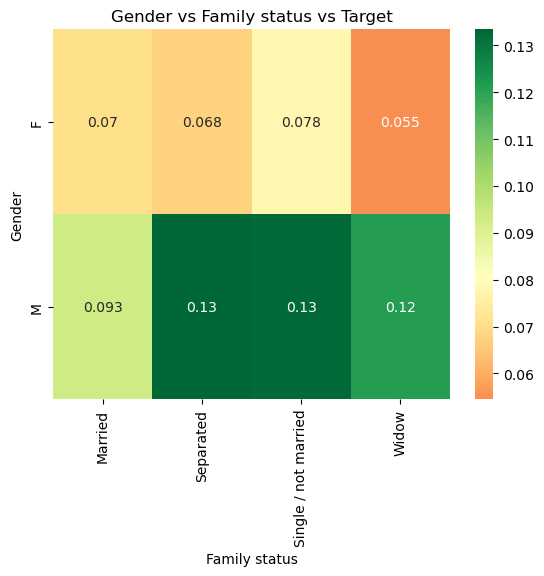

In [151]:
# Plotting heatmap between the 3 variables
sns.heatmap(pvt1, annot= True, cmap="RdYlGn", center=appd.TARGET.mean())
plt.title("Gender vs Family status vs Target")
plt.xlabel("Family status")
plt.ylabel("Gender")
plt.show()

Inferences:
- Unmarried men (single, separated or widowers) have the highest occurrence of loan default
- Female widows have the lowest occurrence of loan default

###### Income Type vs Education Type vs Target

In [152]:
# Creating pivot table between 3 variables
pvt2=pd.pivot_table(appd,index="NAME_INCOME_TYPE", columns='NAME_EDUCATION_TYPE', values='TARGET')
pvt2

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
NAME_INCOME_TYPE,,,,,
Businessman,NaN,0.000000,NaN,NaN,NaN
Commercial associate,0.023256,0.051724,0.082131,0.122004,0.086527
Maternity leave,NaN,0.000000,NaN,NaN,1.000000
Pensioner,0.000000,0.041534,0.044402,0.066710,0.055801
State servant,0.000000,0.038844,0.067620,0.078431,0.070753
Student,NaN,0.000000,0.000000,NaN,0.000000
Unemployed,NaN,0.000000,0.333333,NaN,0.538462
Working,0.027778,0.061663,0.092702,0.145761,0.105173


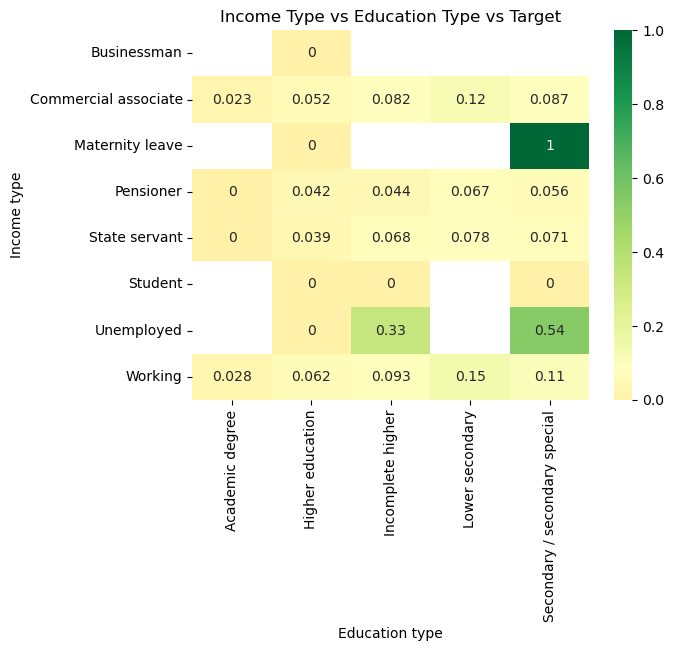

In [153]:
# Plotting heatmap between the 3 variables
sns.heatmap(pvt2, annot= True, cmap="RdYlGn", center=appd.TARGET.mean())
plt.title("Income Type vs Education Type vs Target")
plt.xlabel("Education type")
plt.ylabel("Income type")
plt.show()

Inferences:
- Clients on maternity leave who have not completed higher education have the highest occurrence of loan default.
- Similarly unemployed clients who have not completed higher education have the next highest occurrence of loan default.

###### Income Type vs Organization Type vs Target

In [154]:
# Creating pivot table between 3 variables
pvt3=pd.pivot_table(appd,index="ORGANIZATION_TYPE", columns='NAME_INCOME_TYPE', values='TARGET')
pvt3

NAME_INCOME_TYPE,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working
ORGANIZATION_TYPE,,,,,,,,
Advertising,NaN,0.088889,NaN,NaN,0.058824,NaN,NaN,0.077586
Agriculture,NaN,0.091667,NaN,NaN,0.118421,NaN,NaN,0.106594
Bank,0.0,0.043956,0.0,NaN,0.021277,0.0,NaN,0.063548
Business Entity,0.0,0.073090,0.0,0.000000,0.072523,0.0,NaN,0.101702
Cleaning,NaN,0.095890,NaN,NaN,0.200000,NaN,NaN,0.110497
Construction,NaN,0.100869,NaN,NaN,0.071429,NaN,NaN,0.124754
Culture,NaN,0.034884,NaN,NaN,0.054054,NaN,NaN,0.063927
Electricity,NaN,0.059361,NaN,NaN,0.014925,0.0,NaN,0.074018
Emergency,NaN,0.092593,NaN,NaN,0.060914,NaN,NaN,0.074434


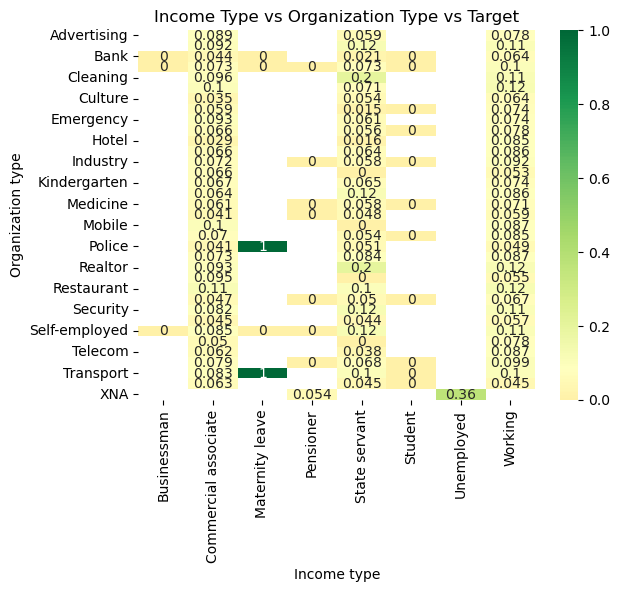

In [155]:
# Plotting heatmap between the 3 variables
sns.heatmap(pvt3, annot= True, cmap="RdYlGn", center=appd.TARGET.mean())
plt.title("Income Type vs Organization Type vs Target")
plt.xlabel("Income type")
plt.ylabel("Organization type")
plt.show()

Inferences:
- Clients on maternity leave from the police and transport industries have the highest occurrence of loan default.
- Similarly, unemployed clients have the next highest occurrence of loan default.

###### Income vs Children count vs Target

In [156]:
# Creating pivot table between 3 variables
pvt8=pd.pivot_table(appd,index="chldcount", columns='incmgrp', values='TARGET')
pvt8

incmgrp,<100k,100k-200k,200k-300k,300k-400k,400k+
chldcount,,,,,
0,0.075312,0.081808,0.073680,0.059548,0.058122
1,0.098169,0.095292,0.079804,0.058201,0.055679
2,0.100037,0.089395,0.077503,0.072382,0.060569
3,0.106700,0.102235,0.088462,0.047368,0.068027
4+,0.169492,0.137184,0.087719,0.047619,0.080000


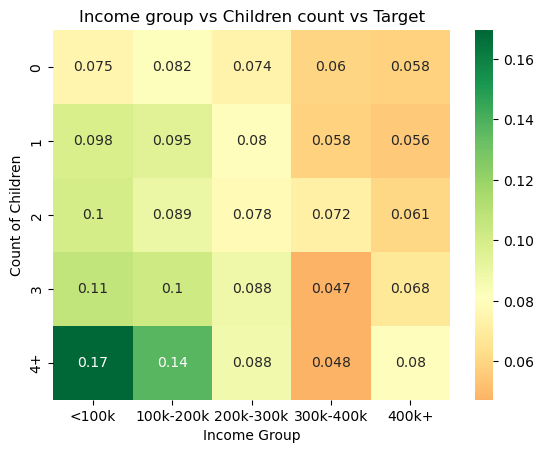

In [229]:
# Plotting heatmap between the 3 variables
sns.heatmap(pvt8, annot= True, cmap="RdYlGn", center=appd.TARGET.mean())
plt.title('Income group vs Children count vs Target')
plt.ylabel('Count of Children')
plt.xlabel('Income Group')
plt.show()

Inferences:
- There is a significant increase in the occurrence of loan default in clients having the lower income group and 4+ children
- Clients having lesser children or higher income have a lower rate of loan default

## Working on the previous application (prapp) dataset

### 1. Removing duplicate data

In [158]:
prapp.shape

(1670214, 37)

In [159]:
# Removing duplicates from the dataset
prapp.drop_duplicates()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


###### There is no duplicated data in the dataframe

### 2. Handling missing values

In [160]:
# Finding the missing values percentage for each column in the dataframe
nulvals(prapp,0)

AMT_ANNUITY                  22.286665
AMT_CREDIT                    0.000060
AMT_DOWN_PAYMENT             53.636480
AMT_GOODS_PRICE              23.081773
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

#### a. Dropping columns with more than 30% missing values

In [161]:
# Dropping all columns with more than 30% missing values as they cannot be used for analysis
prapp.drop(prapp.loc[:,nulvals(prapp,30).keys()].columns,axis=1, inplace=True)

In [162]:
# Checking the remaining missing values
nulvals(prapp,0)

AMT_ANNUITY            22.286665
AMT_CREDIT              0.000060
AMT_GOODS_PRICE        23.081773
CNT_PAYMENT            22.286366
PRODUCT_COMBINATION     0.020716
dtype: float64

#### b. Credit amount and Goods price columns

In [163]:
# Checking the missing rows in Credit amount column
prapp[prapp.AMT_CREDIT.isnull()]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
1127152,2204450,438387,Revolving loans,0.0,0.0,NaN,NaN,FRIDAY,10,Y,...,Repeater,XNA,Cards,walk-in,Country-wide,20,Connectivity,0.0,XNA,Card Street


In [164]:
# This row can be dropped as other values are not available
prapp.dropna(subset='AMT_CREDIT', inplace=True)
# Checking missing values
nulvals(prapp,0)

AMT_ANNUITY            22.286678
AMT_GOODS_PRICE        23.081727
CNT_PAYMENT            22.286379
PRODUCT_COMBINATION     0.020716
dtype: float64

In [165]:
# As confirmed in the previous dataset, the goods price can be inputed from the Credit amount column
prapp.loc[prapp.AMT_GOODS_PRICE.isnull(),'AMT_GOODS_PRICE']=prapp.loc[prapp.AMT_GOODS_PRICE.isnull(),'AMT_CREDIT']
# Checking the missing values
nulvals(prapp,0)

AMT_ANNUITY            22.286678
CNT_PAYMENT            22.286379
PRODUCT_COMBINATION     0.020716
dtype: float64

#### c. Annuity and Payment term columns

As Annuity, Payment term and Credit amount columns are related as per general understanding of loans. We can drop the Annuity and term columns

In [166]:
# Dropping the Annuity and Payment term columns
prapp.drop(['AMT_ANNUITY','CNT_PAYMENT'], axis=1, inplace=True)
# Checking the remaining missing values
nulvals(prapp,0)

PRODUCT_COMBINATION    0.020716
dtype: float64

#### d. Product combination column

We can drop the missing values as the percentage of missing values is 0.02%

In [167]:
# Dropping the missing values
prapp.dropna(inplace=True)
# Checking the remaining missing values
nulvals(prapp,0)

Series([], dtype: float64)

###### We have fixed all null values in the prapp dataset

In [168]:
prapp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,...,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,...,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest
1,2802425,108129,Cash loans,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,...,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high
3,2819243,176158,Cash loans,450000.0,470790.0,450000.0,MONDAY,7,Y,1,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,...,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high


#### e. Filling missing values in NAME_CONTRACT_TYPE 

In [169]:
# Finding the value counts of the client type
prapp.NAME_CLIENT_TYPE.value_counts()

NAME_CLIENT_TYPE
Repeater     1230959
New           301342
Refreshed     135625
XNA             1941
Name: count, dtype: int64

In [170]:
# Filling the XNA values with mode
prapp.loc[prapp.NAME_CLIENT_TYPE=="XNA",'NAME_CLIENT_TYPE']=prapp.NAME_CLIENT_TYPE.mode()

In [171]:
# Checking the value counts of the client type again
prapp.NAME_CLIENT_TYPE.value_counts()

NAME_CLIENT_TYPE
Repeater     1230959
New           301342
Refreshed     135625
Name: count, dtype: int64

### 3. Handling Outliers

###### Checking outliers in all numeric columns

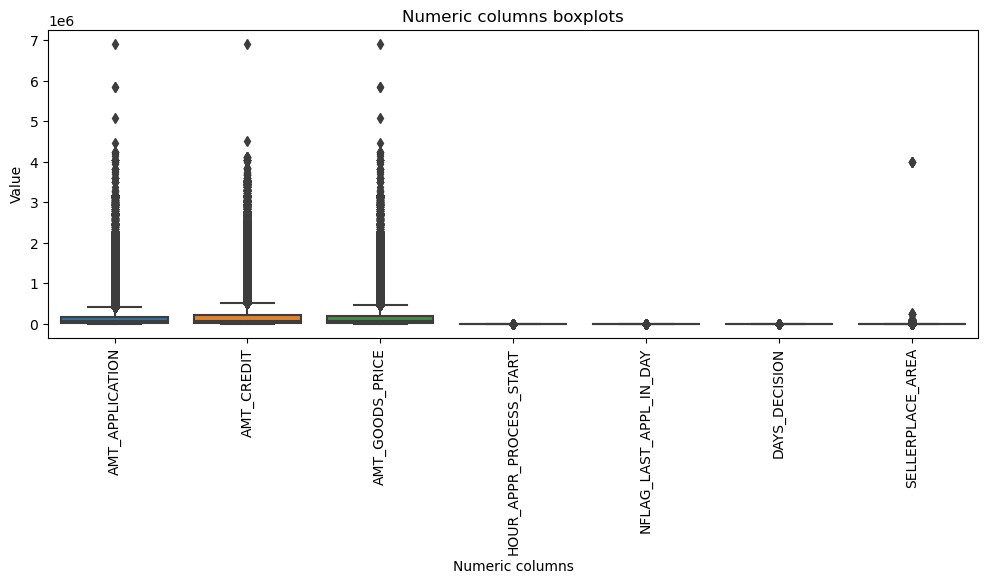

In [172]:
# Identifying Outliers in all Columns except the SK ID
plt.figure(figsize=[12,4])
sns.boxplot(prapp.iloc[:,2:])
plt.xticks(rotation = 90)
plt.title("Numeric columns boxplots")
plt.xlabel("Numeric columns")
plt.ylabel("Value")
plt.show()

###### We can keep all outliers as most of the outliers are in the amount columns

### 4. Standardizing Values

#### a. Portfolio Name

In [173]:
# Finding value counts of Portfolio column
prapp.NAME_PORTFOLIO.value_counts()

NAME_PORTFOLIO
POS      691011
Cash     461563
XNA      371884
Cards    144984
Cars        425
Name: count, dtype: int64

The Cards option is wrongly written as Cars. Correcting the values accordingly

In [174]:
# Correcting the error in Cars
prapp.loc[prapp.NAME_PORTFOLIO=='Cars','NAME_PORTFOLIO']='Cards'
# Checking the values of Portfolio again
prapp.NAME_PORTFOLIO.value_counts()

NAME_PORTFOLIO
POS      691011
Cash     461563
XNA      371884
Cards    145409
Name: count, dtype: int64

### 5. Univariate Analysis

#### a. Categorical unordered univariate analysis

###### Contract Type

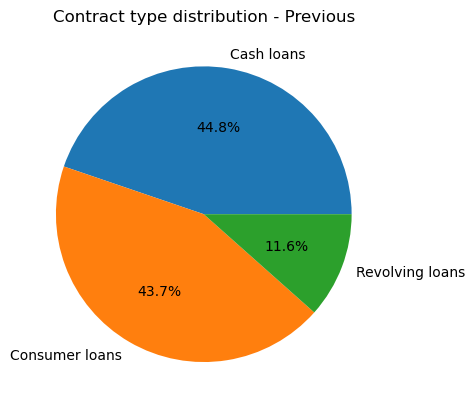

In [175]:
# Printing the pie chart for contract type
plt.pie(prapp.NAME_CONTRACT_TYPE.value_counts(normalize=True), autopct='%.1f%%', labels=prapp.NAME_CONTRACT_TYPE.value_counts(normalize=True).index)
plt.title("Contract type distribution - Previous")
plt.show()

Inferences:
- There is a new category of loans in the previous application dataset which accounts for approximately 44% of the data

###### Contract Status

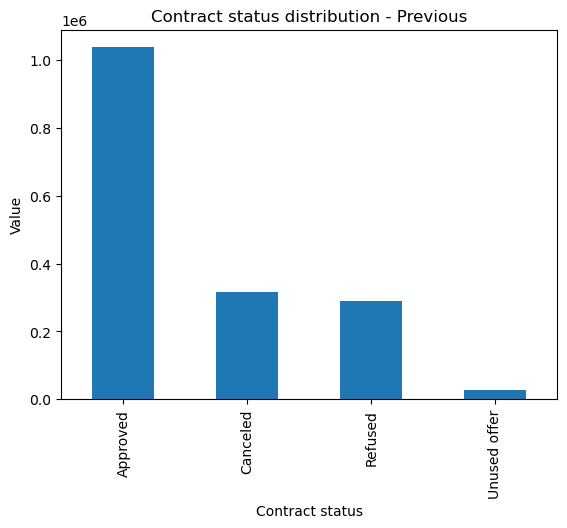

In [176]:
# Printing the bar chart for contract status
prapp.NAME_CONTRACT_STATUS.value_counts().plot.bar()
plt.title("Contract status distribution - Previous")
plt.xlabel("Contract status")
plt.ylabel("Value")
plt.show()

Inferences:
- Most of the previous applications were Approved and very few were unused.

###### Client Type

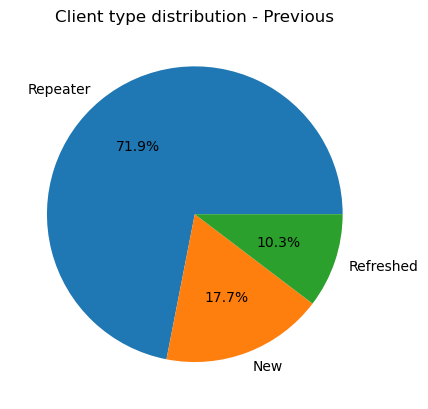

In [230]:
# Printing the pie chart for client type
plt.pie(prapp.NAME_CLIENT_TYPE.value_counts(normalize=True), autopct='%.1f%%', labels=prapp.NAME_CLIENT_TYPE.value_counts(normalize=True).index)
plt.title("Client type distribution - Previous")
plt.show()

Inferences:
- Approximately 74 % of loans were from repeat clients

#### b. Categorical ordered univariate analysis

###### Application process start

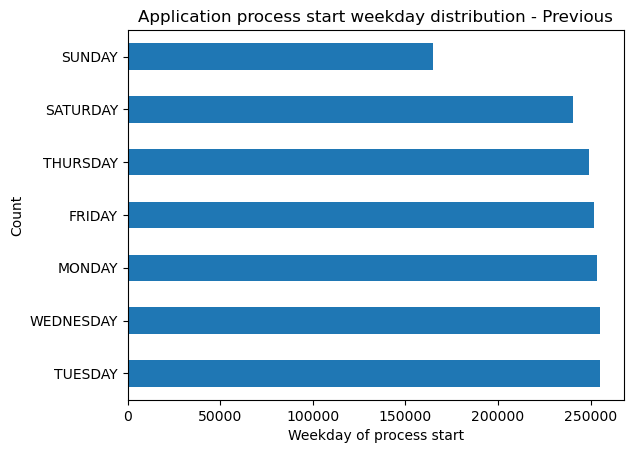

In [178]:
# Printing the bar chart for Application process start
prapp.WEEKDAY_APPR_PROCESS_START.value_counts().plot.barh()
plt.title("Application process start weekday distribution - Previous")
plt.xlabel("Weekday of process start")
plt.ylabel("Count")
plt.show()

Inferences:
- The spread of loan applications was quite even across the weekdays
- Saturday had a higher frequency of loan applications than the current application dataset 

#### c. Numerical variable univariate analysis

###### Decision Days

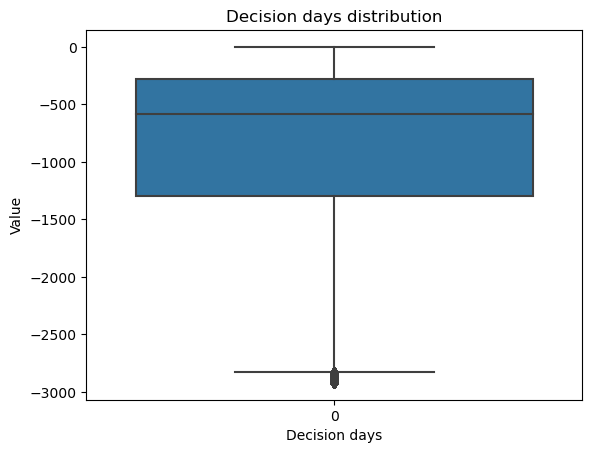

In [179]:
# Printing the box chart for days required for decision
sns.boxplot(prapp.DAYS_DECISION)
plt.title("Decision days distribution")
plt.xlabel("Decision days")
plt.ylabel("Value")
plt.show()

Inferences:
- Most of the loans were processed within approximately 500 days before the current application  

### 6. Bivariate Analysis

#### a. Numeric Numeric Variable

###### Application amount vs Credit amount

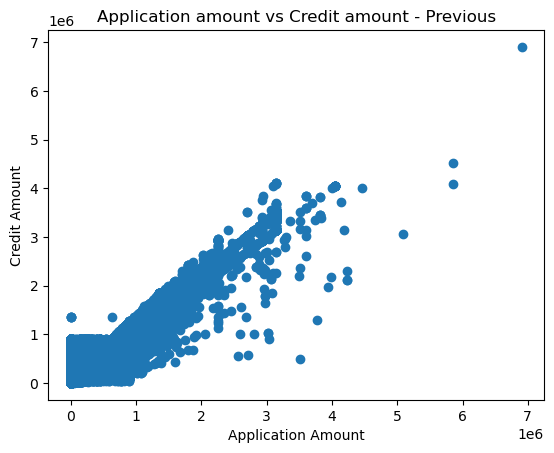

In [180]:
# Plotting the scatter graph between Application & Credit amounts
plt.scatter(prapp.AMT_APPLICATION, prapp.AMT_CREDIT)
plt.xlabel("Application Amount")
plt.ylabel("Credit Amount")
plt.title("Application amount vs Credit amount - Previous")
plt.show()

In [181]:
# Finding the correlation coefficient between application amount and credit amount
prapp[['AMT_APPLICATION', 'AMT_CREDIT']].corr()

,AMT_APPLICATION,AMT_CREDIT
AMT_APPLICATION,1.000000,0.975822
AMT_CREDIT,0.975822,1.000000


Inferences:
- There is a strong correlation between the application amount and credit amount, which makes sense as credit amount is dependent on application amount

#### b. Numerical Categorical Variable

###### Credit Amount vs Contract Status

In [182]:
# Finding the mean and median income for the Target variable
prapp.groupby('NAME_CONTRACT_STATUS')['AMT_CREDIT'].mean()

NAME_CONTRACT_STATUS
Approved        202564.182131
Canceled         24211.167338
Refused         371729.485138
Unused offer     69783.990800
Name: AMT_CREDIT, dtype: float64

In [183]:
prapp.groupby('NAME_CONTRACT_STATUS')['AMT_CREDIT'].median()

NAME_CONTRACT_STATUS
Approved        102208.5
Canceled             0.0
Refused         182956.5
Unused offer     57960.0
Name: AMT_CREDIT, dtype: float64

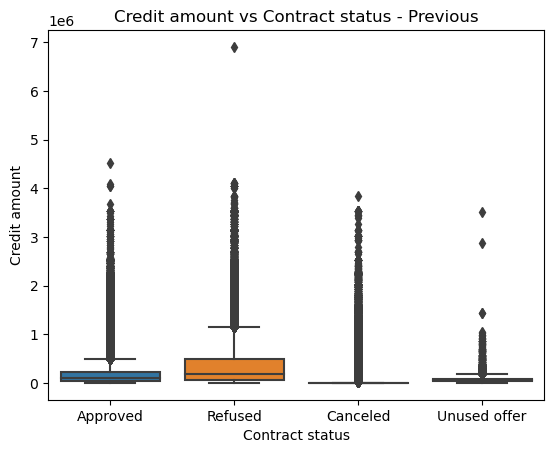

In [184]:
# Plotting the box plot for Contract Status and Credit Amount variables
sns.boxplot(prapp, x='NAME_CONTRACT_STATUS', y='AMT_CREDIT')
plt.title("Credit amount vs Contract status - Previous")
plt.xlabel("Contract status")
plt.ylabel("Credit amount")
plt.show()

Inferences:
- Applications which were refused had a wider spread of the credit amount
- There are quite a few outliers in each case, with most credit amounts being lower than approximately 1,000,000

#### c. Categorical Categorical Variable

###### Contract Type vs Contract Status

###### Creating a new column considering Approved and Unused as 1, Refused and Canceled as 0

In [185]:
# Creating a new column in prapp and imputing the values as per above
prapp['contstat']=pd.Series(dtype='int')
prapp.loc[prapp.NAME_CONTRACT_STATUS=='Unused offer' ,'contstat']=1
prapp.loc[prapp.NAME_CONTRACT_STATUS=='Approved' ,'contstat']=1
prapp.loc[prapp.NAME_CONTRACT_STATUS=='Refused' ,'contstat']=0
prapp.loc[prapp.NAME_CONTRACT_STATUS=='Canceled' ,'contstat']=0
# Checking value counts in conststat column
prapp.contstat.value_counts()

contstat
1.0    1063216
0.0     606651
Name: count, dtype: int64

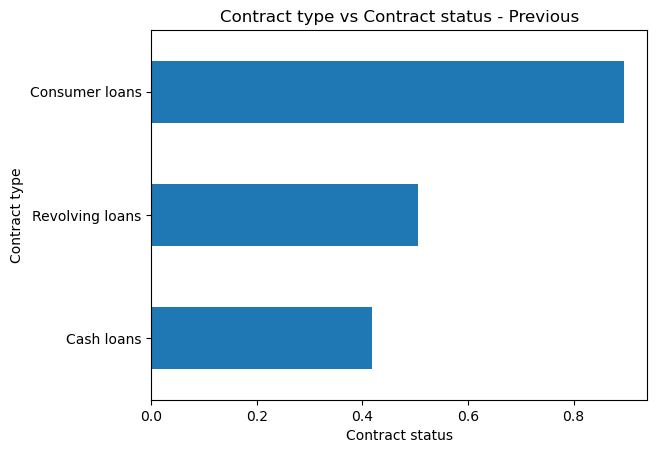

In [186]:
# Plotting the bar graph for contract type vs converted contract status
prapp.groupby('NAME_CONTRACT_TYPE')['contstat'].mean().sort_values().plot.barh()
plt.title("Contract type vs Contract status - Previous")
plt.xlabel("Contract status")
plt.ylabel("Contract type")
plt.show()

Inferences:
- Consumer loans had a higher occurrence of getting approved
- Revolving and Cash loans had lower occurrence of being approved with Cash loans being lowest

### 6. Multivariate Analysis

###### Client Type vs Portfolio vs Contract Status

In [187]:
# Creating pivot table between 3 variables
pvt4=pd.pivot_table(prapp,index="NAME_CLIENT_TYPE", columns='NAME_PORTFOLIO', values='contstat')
pvt4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, New to Repeater
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cards   3 non-null      float64
 1   Cash    3 non-null      float64
 2   POS     3 non-null      float64
 3   XNA     3 non-null      float64
dtypes: float64(4)
memory usage: 120.0+ bytes


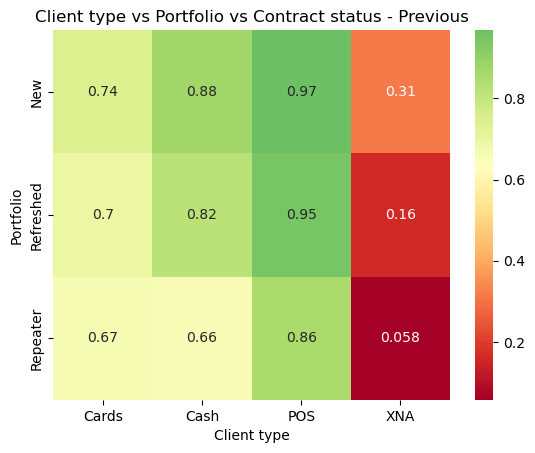

In [188]:
# Plotting heatmap between the 3 variables
sns.heatmap(pvt4, annot= True, cmap="RdYlGn", center=prapp.contstat.mean())
plt.title("Client type vs Portfolio vs Contract status - Previous")
plt.xlabel("Client type")
plt.ylabel("Portfolio")
plt.show()

Inferences:
- New loans of POS type have the highest occurrence of being approved
- Loans where the portfolio is not provided have a lower likelihood for approval
- Overall, new applicants have a higher occurrence of being approved

## Merging the two datasets

We are merging the two datasets into a new dataset cmbd

The previous application dataset has several values which are duplicates. We can drop all duplicate columns based on the least days before decision

In [189]:
prapp.shape

(1669867, 25)

In [190]:
# Removing duplicates in the previous application where last application per contract and per day are 0
prapp=prapp[prapp.FLAG_LAST_APPL_PER_CONTRACT=='Y']
prapp=prapp[prapp.NFLAG_LAST_APPL_IN_DAY==1]
# Checking the reduced number of columns
prapp.shape

(1660606, 25)

In [191]:
prapp.SK_ID_CURR.value_counts()

SK_ID_CURR
187868    77
265681    73
173680    72
206783    67
156367    65
          ..
310059     1
397836     1
448460     1
289580     1
191629     1
Name: count, Length: 338810, dtype: int64

In [192]:
# Removing duplicates in the previous application to keep the most recent previous application
prapp=prapp.sort_values(by='DAYS_DECISION',ascending=False).drop_duplicates('SK_ID_CURR')
prapp.shape

(338810, 25)

In [193]:
# Merging the two datasets
cmbd=pd.merge(left=appd, right=prapp, how='left', on='SK_ID_CURR')

In [194]:
# Checking the merged dataset
cmbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307337 entries, 0 to 307336
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307337 non-null  int64   
 1   TARGET                       307337 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         307337 non-null  object  
 3   CODE_GENDER                  307337 non-null  object  
 4   FLAG_OWN_CAR                 307337 non-null  object  
 5   FLAG_OWN_REALTY              307337 non-null  object  
 6   CNT_CHILDREN                 307337 non-null  int64   
 7   AMT_INCOME_TOTAL             307337 non-null  float64 
 8   AMT_CREDIT_x                 307337 non-null  float64 
 9   AMT_ANNUITY                  307337 non-null  float64 
 10  AMT_GOODS_PRICE_x            307337 non-null  float64 
 11  NAME_INCOME_TYPE             307337 non-null  object  
 12  NAME_EDUCATION_TYPE          307337 non-null

In [195]:
# Finding the size of the combined dataset
cmbd.shape

(307337, 58)

### 1. Handling Missing Values

We can drop all rows having missing values to work on the combined dataset. This will give us a dataset which has all applications with previous application history

In [196]:
# Dropping all rows with null values
cmbd=cmbd[-cmbd.contstat.isnull()]
# Checking final dimensions of the combined dataset
cmbd.shape

(290911, 58)

### 2. Univariate Analysis

#### a. Categorical unordered variable

###### Contract Type

In [197]:
# Finding the types of contract types left in the combined dataset
cmbd.NAME_CONTRACT_TYPE_x.value_counts(normalize=True)

NAME_CONTRACT_TYPE_x
Cash loans         0.909316
Revolving loans    0.090684
Name: proportion, dtype: float64

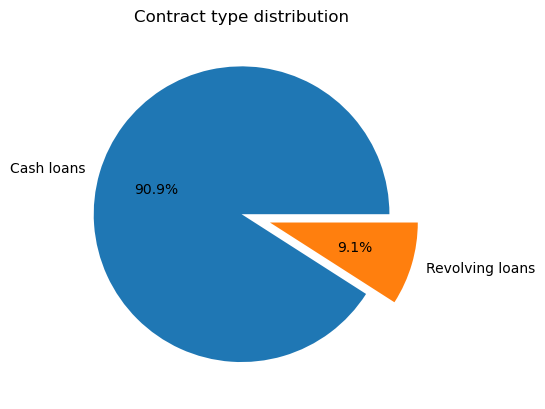

In [198]:
# Plotting a pie chart for contract type
plt.pie(cmbd.NAME_CONTRACT_TYPE_x.value_counts(normalize=True), explode=[0,.2], autopct='%.1f%%', labels=appd.NAME_CONTRACT_TYPE.value_counts(normalize=True).index)
plt.title("Contract type distribution")
plt.show()

Inferences:
- The number of cash loans has slightly increased after dropping the rows with no previous application history

#### b. Categorical ordered variable

###### Education Type

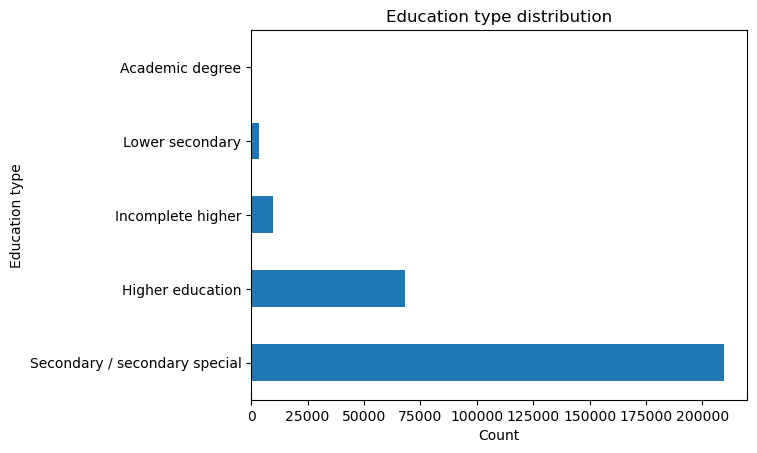

In [199]:
# Plotting a horizontal bar chart for education level
cmbd.NAME_EDUCATION_TYPE.value_counts().plot.barh()
plt.title("Education type distribution")
plt.ylabel("Education type")
plt.xlabel("Count")
plt.show()

Inferences:
- Most of the clients are from the Secondary education level
- The next biggest level of education is Higher Education
- Lowest number of clients have an academic degree

#### c. Numerical variable

###### Days between the current and previous loans

In [200]:
# describing the Days Decision column
cmbd.DAYS_DECISION.describe()

count    290911.000000
mean       -481.093936
std         540.545450
min       -2922.000000
25%        -596.000000
50%        -299.000000
75%        -147.000000
max          -1.000000
Name: DAYS_DECISION, dtype: float64

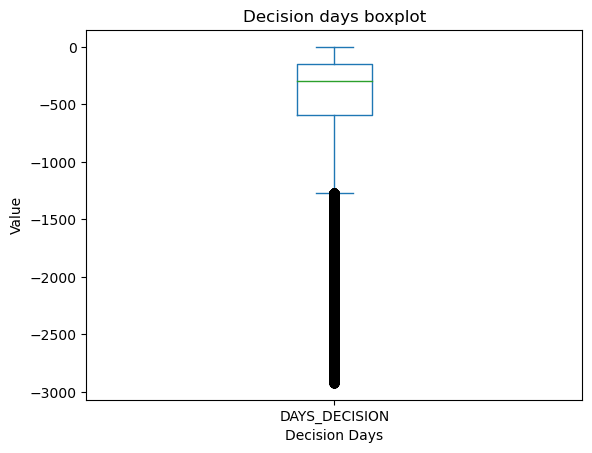

In [201]:
# Plotting box plot for Days Decision column
cmbd.DAYS_DECISION.plot.box()
plt.title("Decision days boxplot")
plt.xlabel("Decision Days")
plt.ylabel("Value")
plt.show()

Inferences:
- Most applicants have 3.5 years or below between their loans 
- About half the clients have taken another loan in approximately a year from their previous loan

### 3. Bivariate Analysis

#### a. Numeric Numeric Variables

###### Current credit amount vs Previous credit amount

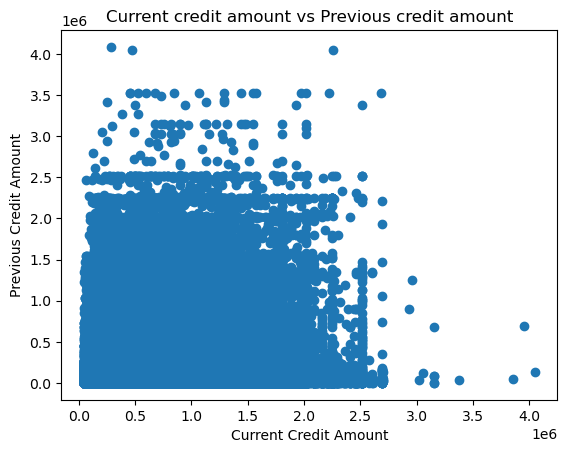

In [202]:
# Plotting the scatter graph between Income & Credit amounts
plt.scatter(cmbd.AMT_CREDIT_x, cmbd.AMT_CREDIT_y)
plt.xlabel("Current Credit Amount")
plt.ylabel("Previous Credit Amount")
plt.title("Current credit amount vs Previous credit amount")
plt.show()

Inferences
- There is weak correlation between the current and previous credit amounts

#### b. Categorical Numeric Variables

###### Target vs Previous Application amount

In [203]:
# Finding the mean and median Previous Application amount for the Target variable
cmbd.groupby('TARGET')['AMT_APPLICATION'].mean()

TARGET
0    168417.370052
1    147504.608247
Name: AMT_APPLICATION, dtype: float64

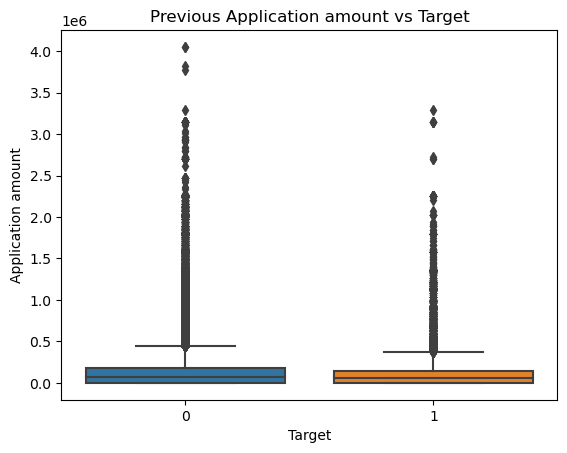

In [204]:
# Plotting the box plot for previous application amount and Target variables
sns.boxplot(cmbd, x='TARGET', y='AMT_APPLICATION')
plt.title("Previous Application amount vs Target")
plt.xlabel("Target")
plt.ylabel("Application amount")
plt.show()

Inferences:
- Loan default does not seem to be related to the application amount

#### c. Categorical Categorical Variables

###### Target vs Previous loan status

In [205]:
# Verifying the value counts for previous loan status
cmbd.NAME_CONTRACT_STATUS.value_counts()

NAME_CONTRACT_STATUS
Approved        178769
Canceled         74530
Refused          32050
Unused offer      5562
Name: count, dtype: int64

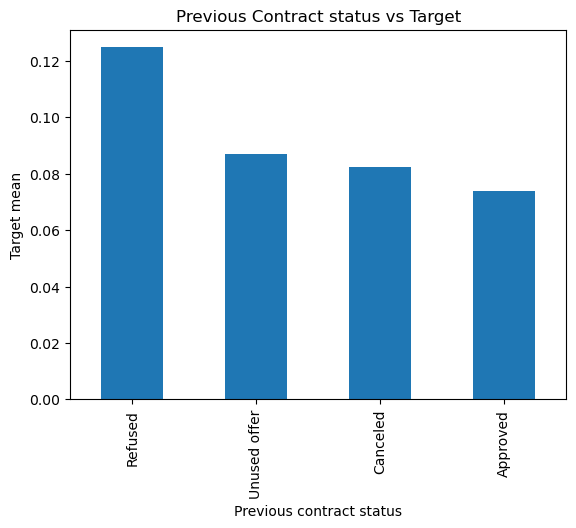

In [231]:
# Plotting a bar graph between Previous loan status and Target
cmbd.groupby('NAME_CONTRACT_STATUS')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title("Previous Contract status vs Target")
plt.xlabel("Previous contract status")
plt.ylabel("Target mean")
plt.show()

Inferences:
- The loan default rate is higher for cases where the previous application was refused
- For all other categories, the default rate is similar

###### Target vs Channel Type

In [207]:
# Verifying the value counts for Channel type
cmbd.CHANNEL_TYPE.value_counts()

CHANNEL_TYPE
Credit and cash offices       119762
Country-wide                   82496
Stone                          36925
Regional / Local               21804
Contact center                 18641
AP+ (Cash loan)                10136
Channel of corporate sales      1115
Car dealer                        32
Name: count, dtype: int64

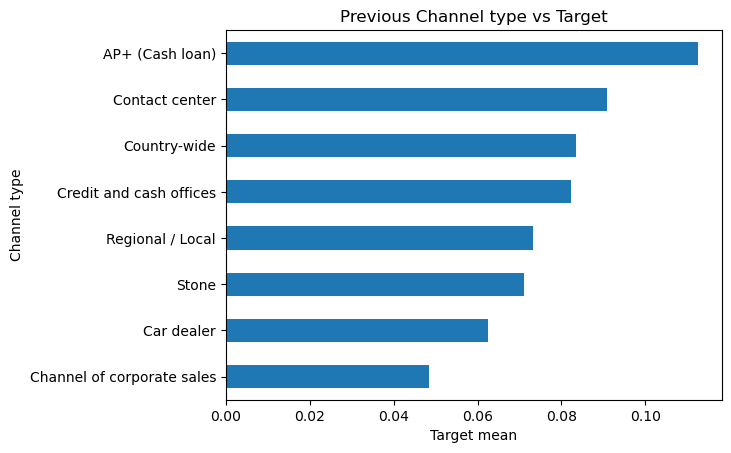

In [208]:
# Plotting a bar graph between Channel Type and Target
cmbd.groupby('CHANNEL_TYPE')['TARGET'].mean().sort_values().plot.barh()
plt.title("Previous Channel type vs Target")
plt.ylabel("Channel type")
plt.xlabel("Target mean")
plt.show()

Inferences:
- Clients which have been acquired from channel AP+ (Cash loan) have the highest rate of default
- Clients which are acquired through corporate sales have lowest rate of default

###### Target vs Product Combination

In [209]:
# Verifying the value counts for Product Combination
cmbd.PRODUCT_COMBINATION.value_counts()

PRODUCT_COMBINATION
Cash                              66800
POS household with interest       42184
POS mobile with interest          35044
Cash X-Sell: low                  22534
POS industry with interest        21754
Cash X-Sell: middle               20163
Card Street                       19462
POS household without interest    12963
Card X-Sell                       11672
Cash X-Sell: high                  7319
POS mobile without interest        7284
POS other with interest            6105
Cash Street: high                  5326
Cash Street: low                   4865
Cash Street: middle                3821
POS industry without interest      2726
POS others without interest         889
Name: count, dtype: int64

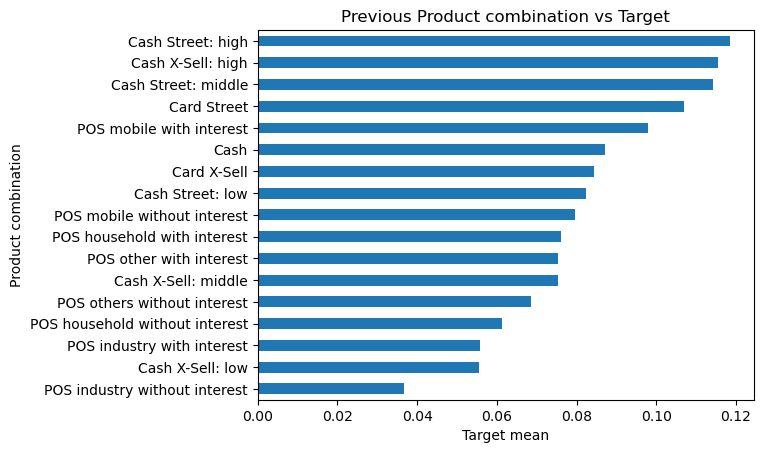

In [210]:
# Plotting a bar graph between Product combination and Target
cmbd.groupby('PRODUCT_COMBINATION')['TARGET'].mean().sort_values().plot.barh()
plt.title("Previous Product combination vs Target")
plt.ylabel("Product combination")
plt.xlabel("Target mean")
plt.show()

Inferences:
- Clients with product combination of Cash Street: high have the highest occurrences of default
- Clients with POS industry without and with industries have the lowest rates of default

###### Target vs Previous goods category

In [211]:
# Verifying the value counts for Previous goods category
cmbd.NAME_GOODS_CATEGORY.value_counts()

NAME_GOODS_CATEGORY
XNA                         162390
Mobile                       37299
Computers                    20182
Consumer Electronics         19703
Audio/Video                  15559
Furniture                    11110
Clothing and Accessories      5823
Construction Materials        5361
Photo / Cinema Equipment      3240
Jewelry                       1946
Auto Accessories              1819
Homewares                     1336
Medical Supplies              1171
Vehicles                       891
Sport and Leisure              648
Gardening                      604
Tourism                        522
Medicine                       486
Office Appliances              323
Direct Sales                   212
Other                          119
Fitness                         85
Education                       45
Weapon                          16
Additional Service              11
Insurance                       10
Name: count, dtype: int64

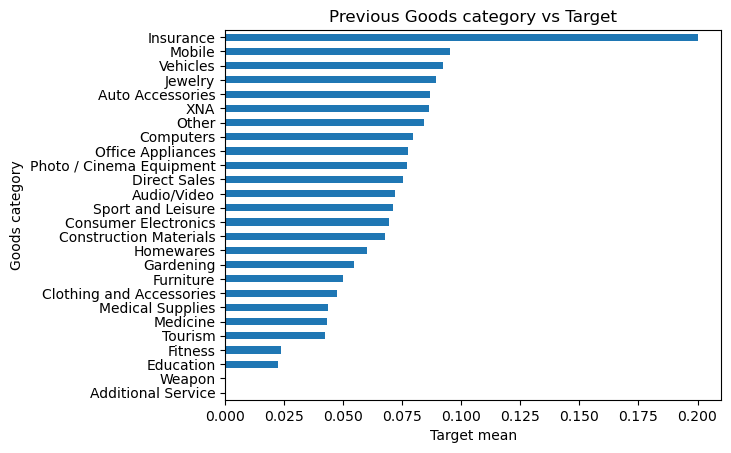

In [212]:
# Plotting a bar graph between Previous goods category and Target
cmbd.groupby('NAME_GOODS_CATEGORY')['TARGET'].mean().sort_values().plot.barh()
plt.title("Previous Goods category vs Target")
plt.ylabel("Goods category")
plt.xlabel("Target mean")
plt.show()

Inferences:
- Clients who have taken loans for insurance have the highest rate of loan default
- Clients taking loans for education have the lowest rate of loan default

### 4. Multivariate Analysis

###### Target vs Current loan type vs Previous loan status

In [213]:
# Creating pivot table between 3 variables
pvt5=pd.pivot_table(cmbd,index="NAME_CONTRACT_TYPE_x", columns='NAME_CONTRACT_STATUS', values='TARGET')
pvt5

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_CONTRACT_TYPE_x,,,,
Cash loans,0.076096,0.084689,0.128745,0.088166
Revolving loans,0.053756,0.054949,0.073310,0.073171


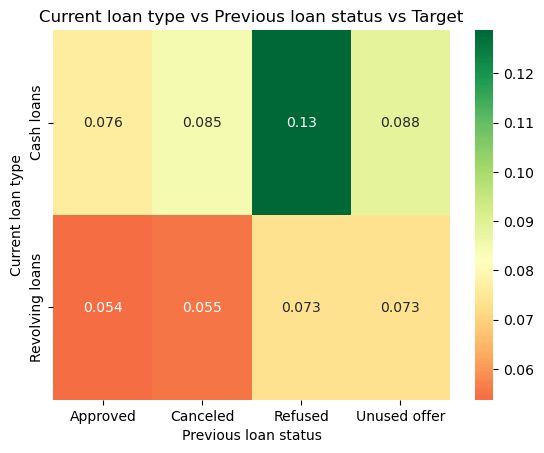

In [214]:
# Plotting heatmap between the 3 variables
sns.heatmap(pvt5, annot= True, cmap="RdYlGn", center=cmbd.TARGET.mean())
plt.title("Current loan type vs Previous loan status vs Target")
plt.ylabel("Current loan type")
plt.xlabel("Previous loan status")
plt.show()

Inferences:
- Clients applying for Cash loans with a history of being refused have the highest occurrence of default 

###### Target vs Gender vs Previous goods category

In [215]:
# Creating pivot table between 3 variables
pvt6=pd.pivot_table(cmbd,index="CODE_GENDER", columns='NAME_GOODS_CATEGORY', values='TARGET')
pvt6

NAME_GOODS_CATEGORY,Additional Service,Audio/Video,Auto Accessories,Clothing and Accessories,Computers,Construction Materials,Consumer Electronics,Direct Sales,Education,Fitness,...,Medicine,Mobile,Office Appliances,Other,Photo / Cinema Equipment,Sport and Leisure,Tourism,Vehicles,Weapon,XNA
CODE_GENDER,,,,,,,,,,,,,,,,,,,,,
F,0.0,0.058613,0.062397,0.043401,0.068058,0.057752,0.058524,0.061453,0.03125,0.014286,...,0.040685,0.083241,0.065000,0.101449,0.066667,0.066225,0.031915,0.071429,0.0,0.075655
M,0.0,0.090276,0.099174,0.072944,0.096082,0.087514,0.093546,0.151515,0.00000,0.066667,...,0.105263,0.113998,0.097561,0.060000,0.093827,0.075145,0.068493,0.107212,0.0,0.108556


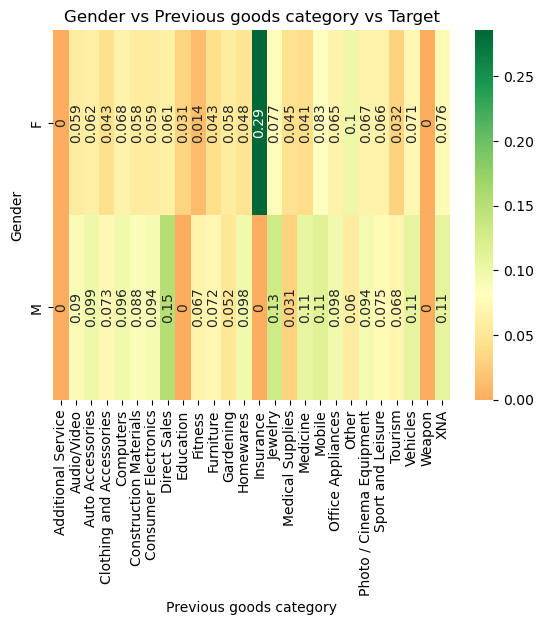

In [216]:
# Plotting heatmap between the 3 variables
sns.heatmap(pvt6, annot= True, cmap="RdYlGn", center=cmbd.TARGET.mean(), annot_kws={'rotation': 90})
plt.title("Gender vs Previous goods category vs Target")
plt.ylabel("Gender")
plt.xlabel("Previous goods category")
plt.show()

Inferences:
- Females taking loan for insurance previously have the highest rate of default
- Males have the highest occurrence of default for Direct Sales and Jewelry

###### Target vs Housing type vs Channel type

In [217]:
# Creating pivot table between 3 variables
pvt7=pd.pivot_table(cmbd,index="NAME_HOUSING_TYPE", columns='CHANNEL_TYPE', values='TARGET')
pvt7

CHANNEL_TYPE,AP+ (Cash loan),Car dealer,Channel of corporate sales,Contact center,Country-wide,Credit and cash offices,Regional / Local,Stone
NAME_HOUSING_TYPE,,,,,,,,
Co-op apartment,0.285714,NaN,0.250000,0.157895,0.083039,0.060976,0.073171,0.037736
House / apartment,0.109409,0.066667,0.051230,0.087736,0.080370,0.079391,0.070151,0.068714
Municipal apartment,0.113527,0.000000,0.000000,0.094077,0.080476,0.088587,0.082287,0.078083
Office apartment,0.148148,NaN,0.000000,0.086420,0.065333,0.072000,0.045685,0.042105
Rented apartment,0.169643,NaN,0.031250,0.106707,0.129757,0.132396,0.115183,0.103672
With parents,0.157333,0.000000,0.022472,0.131181,0.117202,0.122988,0.106710,0.109404


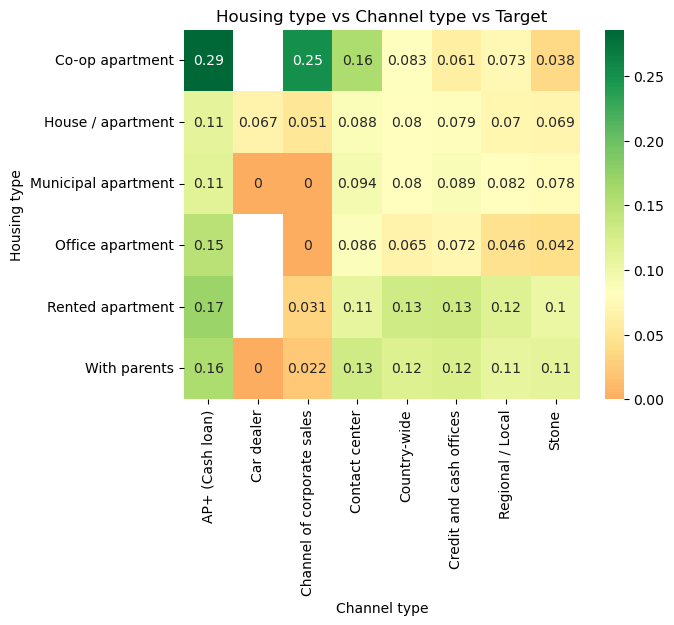

In [218]:
# Plotting heatmap between the 3 variables
sns.heatmap(pvt7, annot= True, cmap="RdYlGn", center=cmbd.TARGET.mean())
plt.title("Housing type vs Channel type vs Target")
plt.ylabel("Housing type")
plt.xlabel("Channel type")
plt.show()

Inferences:
- Clients staying at Co-op apartments through the AP+ (Cash loan) have the highest occurrence of default

###### Previous Credit amount vs Hour of process start vs Gender

In [219]:
cmbd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290911 entries, 0 to 307336
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   290911 non-null  int64   
 1   TARGET                       290911 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         290911 non-null  object  
 3   CODE_GENDER                  290911 non-null  object  
 4   FLAG_OWN_CAR                 290911 non-null  object  
 5   FLAG_OWN_REALTY              290911 non-null  object  
 6   CNT_CHILDREN                 290911 non-null  int64   
 7   AMT_INCOME_TOTAL             290911 non-null  float64 
 8   AMT_CREDIT_x                 290911 non-null  float64 
 9   AMT_ANNUITY                  290911 non-null  float64 
 10  AMT_GOODS_PRICE_x            290911 non-null  float64 
 11  NAME_INCOME_TYPE             290911 non-null  object  
 12  NAME_EDUCATION_TYPE          290911 non-null  obj

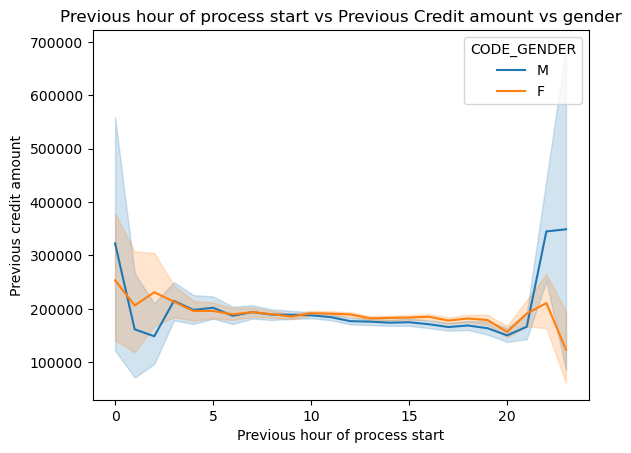

In [220]:
# Plotting the line graph between Previous credit and Hour of process start with a gender hue
sns.lineplot(cmbd,x='HOUR_APPR_PROCESS_START', y='AMT_CREDIT_y', hue="CODE_GENDER")
plt.title("Previous hour of process start vs Previous Credit amount vs gender")
plt.ylabel("Previous credit amount")
plt.xlabel("Previous hour of process start")
plt.show()

Inferences
- Male clients usually submit applications late at night
- Applications for larger credit amounts are usually placed during late nights